In [34]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import seaborn as sns

# suppress warning
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import missingno as msno
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, CyclicLR
import torch.nn.functional as F

#sns.set()

%matplotlib inline

In [30]:
#!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.0/628.0 kB 10.4 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
#!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
#!pip install missingno


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install xgboost

1. initialize data
- drop MAR,MCAR missing value
- fill MNAR missing value
- type convert(date,price,etc)
- drop outliers
2. feature engineering
- multicollinearity
- one hot encode
3. quick random forest: see the important features
4. tune paremeters

# Data Cleaning

In [6]:
# Get the current directory
current_directory = os.getcwd()

# Define the path to the data folder
data_folder = os.path.join(current_directory, 'Data')

# List all files in the data folder
files = os.listdir(data_folder)


# Read each CSV file in the data folder
for file in files:
    if file.endswith('listings2024_03.csv'):
        print("df2024_03")
        file_path1 = os.path.join(data_folder, file)
        df2024_03 = pd.read_csv(file_path1)
    elif file.endswith('listings2024_02.csv'):
        print("df2024_02")
        file_path2 = os.path.join(data_folder, file)
        df2024_02 = pd.read_csv(file_path2)
    elif file.endswith("listings2024_01.csv"):
        print("df2024_01")
        file_path3 = os.path.join(data_folder, file)
        df2024_01 = pd.read_csv(file_path3)
    elif file.endswith("listings2023_12.csv"):
        print("df2023_12")
        file_path4 = os.path.join(data_folder, file)
        df2023_12 = pd.read_csv(file_path4)
    elif file.endswith("listings2023_11.csv"):
        print("df2023_11")
        file_path5 = os.path.join(data_folder, file)
        df2023_11 = pd.read_csv(file_path5)
    elif file.endswith("listings2023_10.csv"):
        print("df2023_10")
        file_path6 = os.path.join(data_folder, file)
        df2023_10 = pd.read_csv(file_path6)
    elif file.endswith("listings2023_09.csv"):
        print("df2023_09")
        file_path7 = os.path.join(data_folder, file)
        df2023_09 = pd.read_csv(file_path7)
    elif file.endswith("listings2023_08.csv"):
        print("df2023_08")
        file_path8 = os.path.join(data_folder, file)
        df2023_08 = pd.read_csv(file_path8)
    elif file.endswith("listings2023_07.csv"):
        print("df2023_07")
        file_path9 = os.path.join(data_folder, file)
        df2023_07 = pd.read_csv(file_path9)
    elif file.endswith("listings2023_06.csv"):
        print("df2023_06")
        file_path10 = os.path.join(data_folder, file)
        df2023_06 = pd.read_csv(file_path10)
    elif file.endswith("listings2023_05.csv"):
        print("df2023_05")
        file_path11 = os.path.join(data_folder, file)
        df2023_05 = pd.read_csv(file_path11)
    elif file.endswith("listings2023_04.csv"):
        print("df2023_04")
        file_path12 = os.path.join(data_folder, file)
        df2023_04 = pd.read_csv(file_path12)

df2023_08
df2024_01
df2023_09
df2024_02
df2024_03
df2023_07
df2023_12
df2023_06
df2023_10
df2023_04
df2023_05
df2023_11


In [7]:
# List of DataFrames
dataframes = [
    df2023_08, df2024_01, df2023_09, df2024_02, df2024_03,
    df2023_07, df2023_12, df2023_06, df2023_10, df2023_04,
    df2023_05, df2023_11
]

# Dictionary to hold the names and lengths
df_lengths = {}

# Iterate through the DataFrames and print their lengths
for i, df in enumerate(dataframes, start=4):
    month_year = f"df2023_{i:02}" if i < 13 else f"df2024_{i - 12:02}"
    df_lengths[month_year] = len(df)

# Print the lengths
for name, length in df_lengths.items():
    print(f"Length of {name}: {length}")

Length of df2023_04: 43582
Length of df2023_05: 39719
Length of df2023_06: 39453
Length of df2023_07: 39202
Length of df2023_08: 39319
Length of df2023_09: 43729
Length of df2023_10: 39627
Length of df2023_11: 43566
Length of df2023_12: 38792
Length of df2024_01: 43241
Length of df2024_02: 43303
Length of df2024_03: 39160


In [8]:
df_missing_values = {}

for i, df in enumerate(dataframes, start=4):
    month_year = f"df2023_{i:02}" if i < 13 else f"df2024_{i - 12:02}"
    df_missing_values[month_year] = df.isnull().sum()

for name, missing_counts in df_missing_values.items():
    print(f"Missing values in {name}:")
    print(missing_counts)
    print()

Missing values in df2023_04:
id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10603
reviews_per_month                 10603
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           43582
dtype: int64

Missing values in df2023_05:
id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbou

## Initialize Data

In [83]:
df2024_1=pd.read_csv('df2024_1.csv')

In [84]:
df2024_1.drop(['id', 'listing_url', 'scrape_id','source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name','host_location', 'host_about','host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'neighbourhood','latitude','neighbourhood_group_cleansed','calendar_last_scraped',
       'longitude','license'],axis=1,inplace=True)

In [85]:
df2024_1.dtypes

last_scraped                                     object
host_since                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood_cleansed                           object
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bathrooms_text                                   object
bedrooms                                        float64
beds                                            float64
amenities                                        object
price                                           

In [86]:
df2024_1.describe()

,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,39202.000000,24335.000000,33011.000000,24222.000000,39202.000000,3.920200e+04,39200.000000,39200.000000,3.920000e+04,3.920000e+04,...,27713.000000,27698.000000,27708.000000,27696.000000,27697.000000,39202.000000,39202.000000,39202.000000,39202.000000,27702.000000
mean,2.848860,1.202979,1.403532,1.681736,29.634432,5.640459e+04,29.583495,37.791480,7.686786e+05,1.700019e+06,...,4.629591,4.814092,4.808529,4.727991,4.624456,46.842661,24.227565,21.772690,0.050508,0.953946
std,2.029674,0.556281,0.953565,1.254421,30.172981,1.084709e+07,32.040758,60.007764,4.057712e+07,6.036737e+07,...,0.553984,0.420550,0.448769,0.418802,0.518733,146.693303,120.567818,86.976619,0.369496,1.633604
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.000000,1.000000,1.000000,1.000000,30.000000,1.500000e+02,30.000000,30.000000,3.650000e+02,3.650000e+02,...,4.500000,4.800000,4.800000,4.630000,4.510000,1.000000,0.000000,0.000000,0.000000,0.100000
50%,2.000000,1.000000,1.000000,1.000000,30.000000,3.650000e+02,30.000000,30.000000,1.125000e+03,1.125000e+03,...,4.800000,4.940000,4.960000,4.840000,4.760000,1.000000,1.000000,1.000000,0.000000,0.360000
75%,4.000000,1.000000,2.000000,2.000000,30.000000,1.125000e+03,30.000000,30.000000,1.125000e+03,1.125000e+03,...,5.000000,5.000000,5.000000,5.000000,4.930000,6.000000,2.000000,2.000000,0.000000,1.300000
max,16.000000,15.500000,26.000000,42.000000,1250.000000,2.147484e+09,1250.000000,1250.000000,2.147484e+09,2.147484e+09,...,5.000000,5.000000,5.000000,5.000000,5.000000,827.000000,827.000000,599.000000,8.000000,78.250000


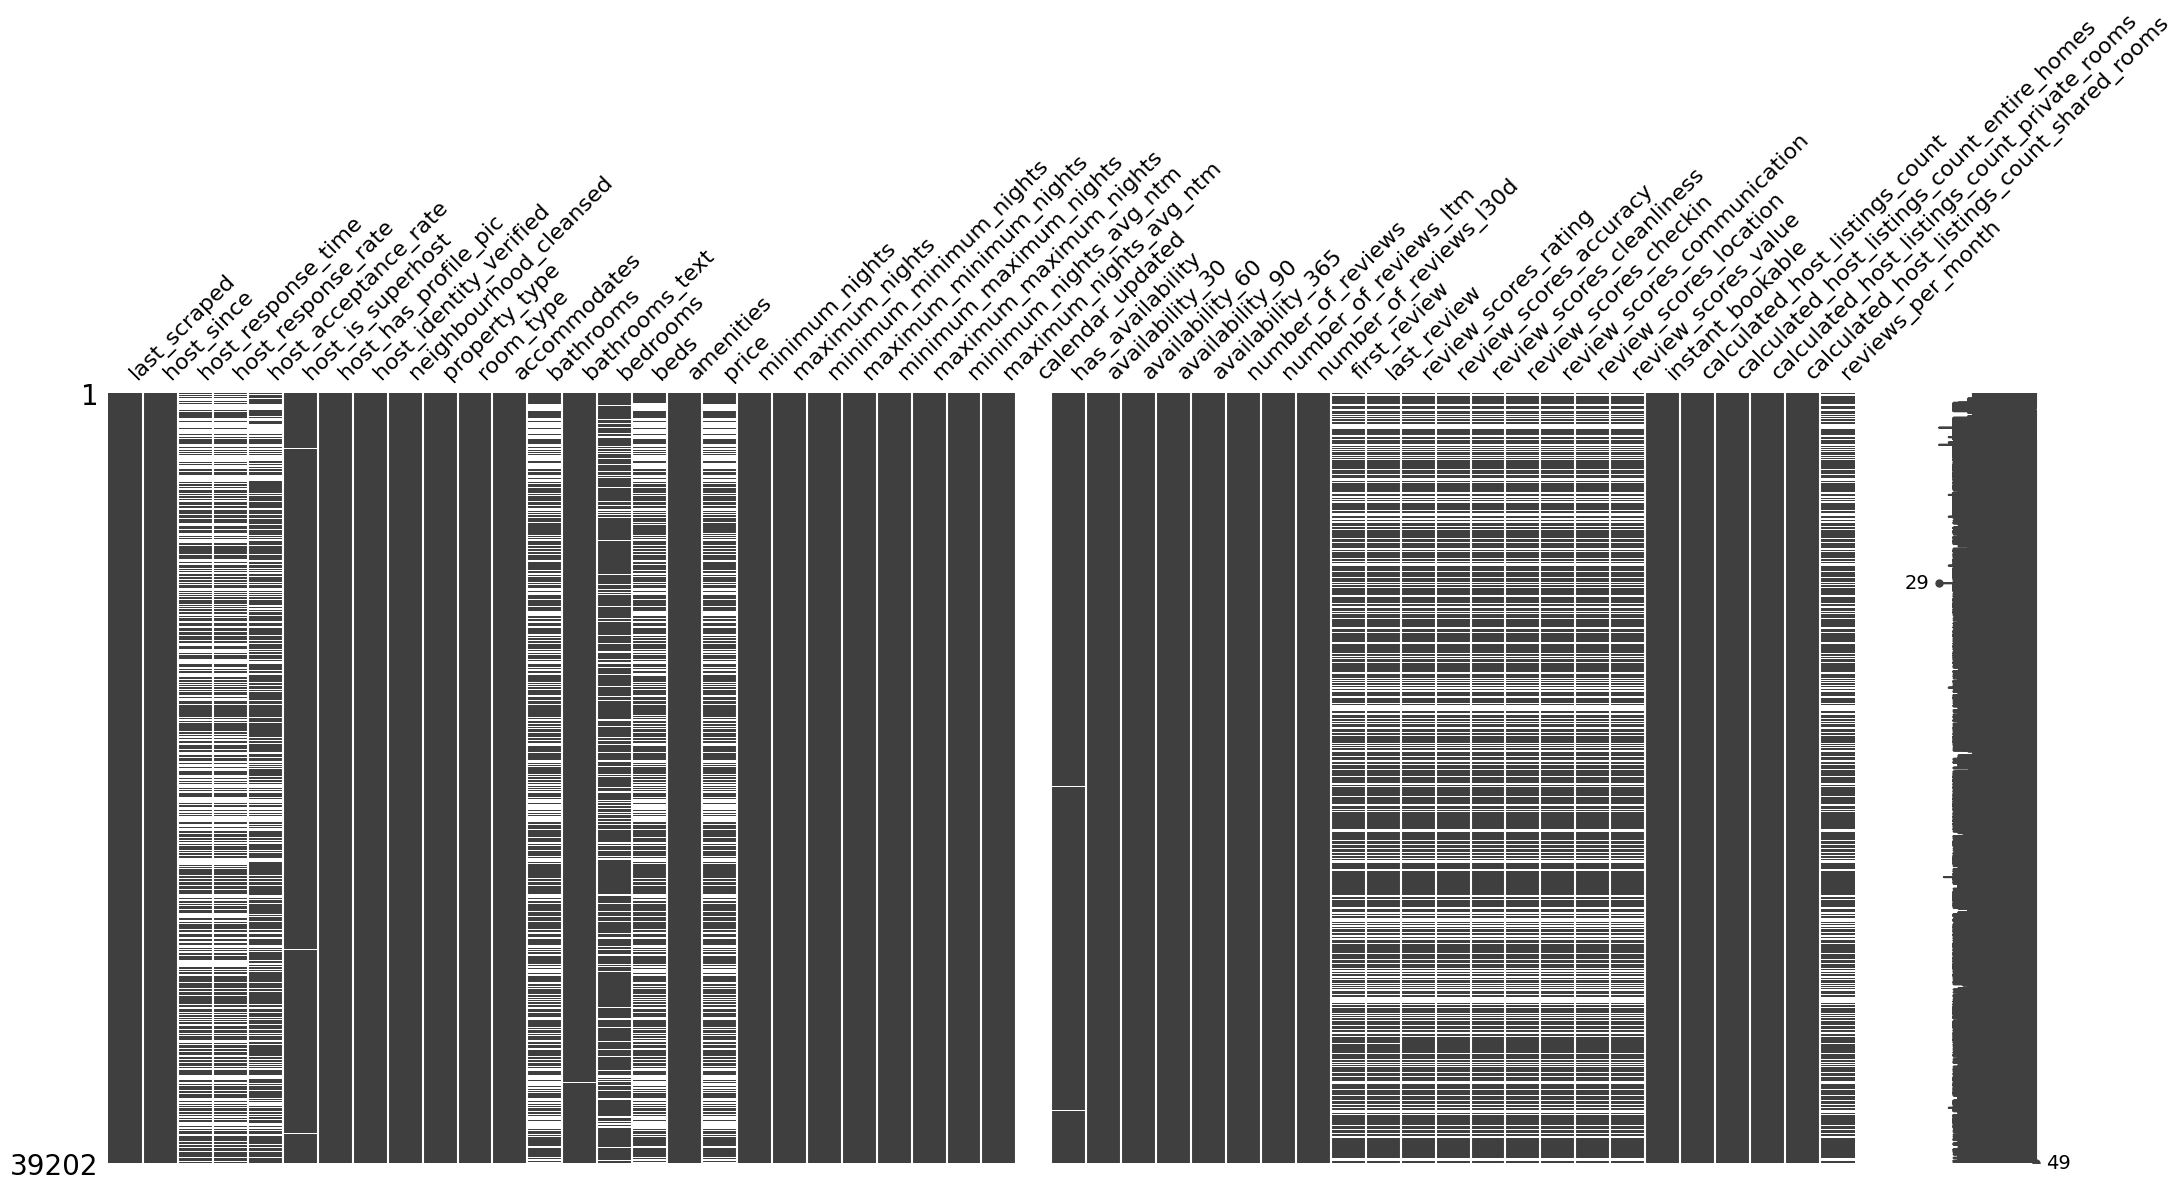

ValueError: could not convert string to float: '--'

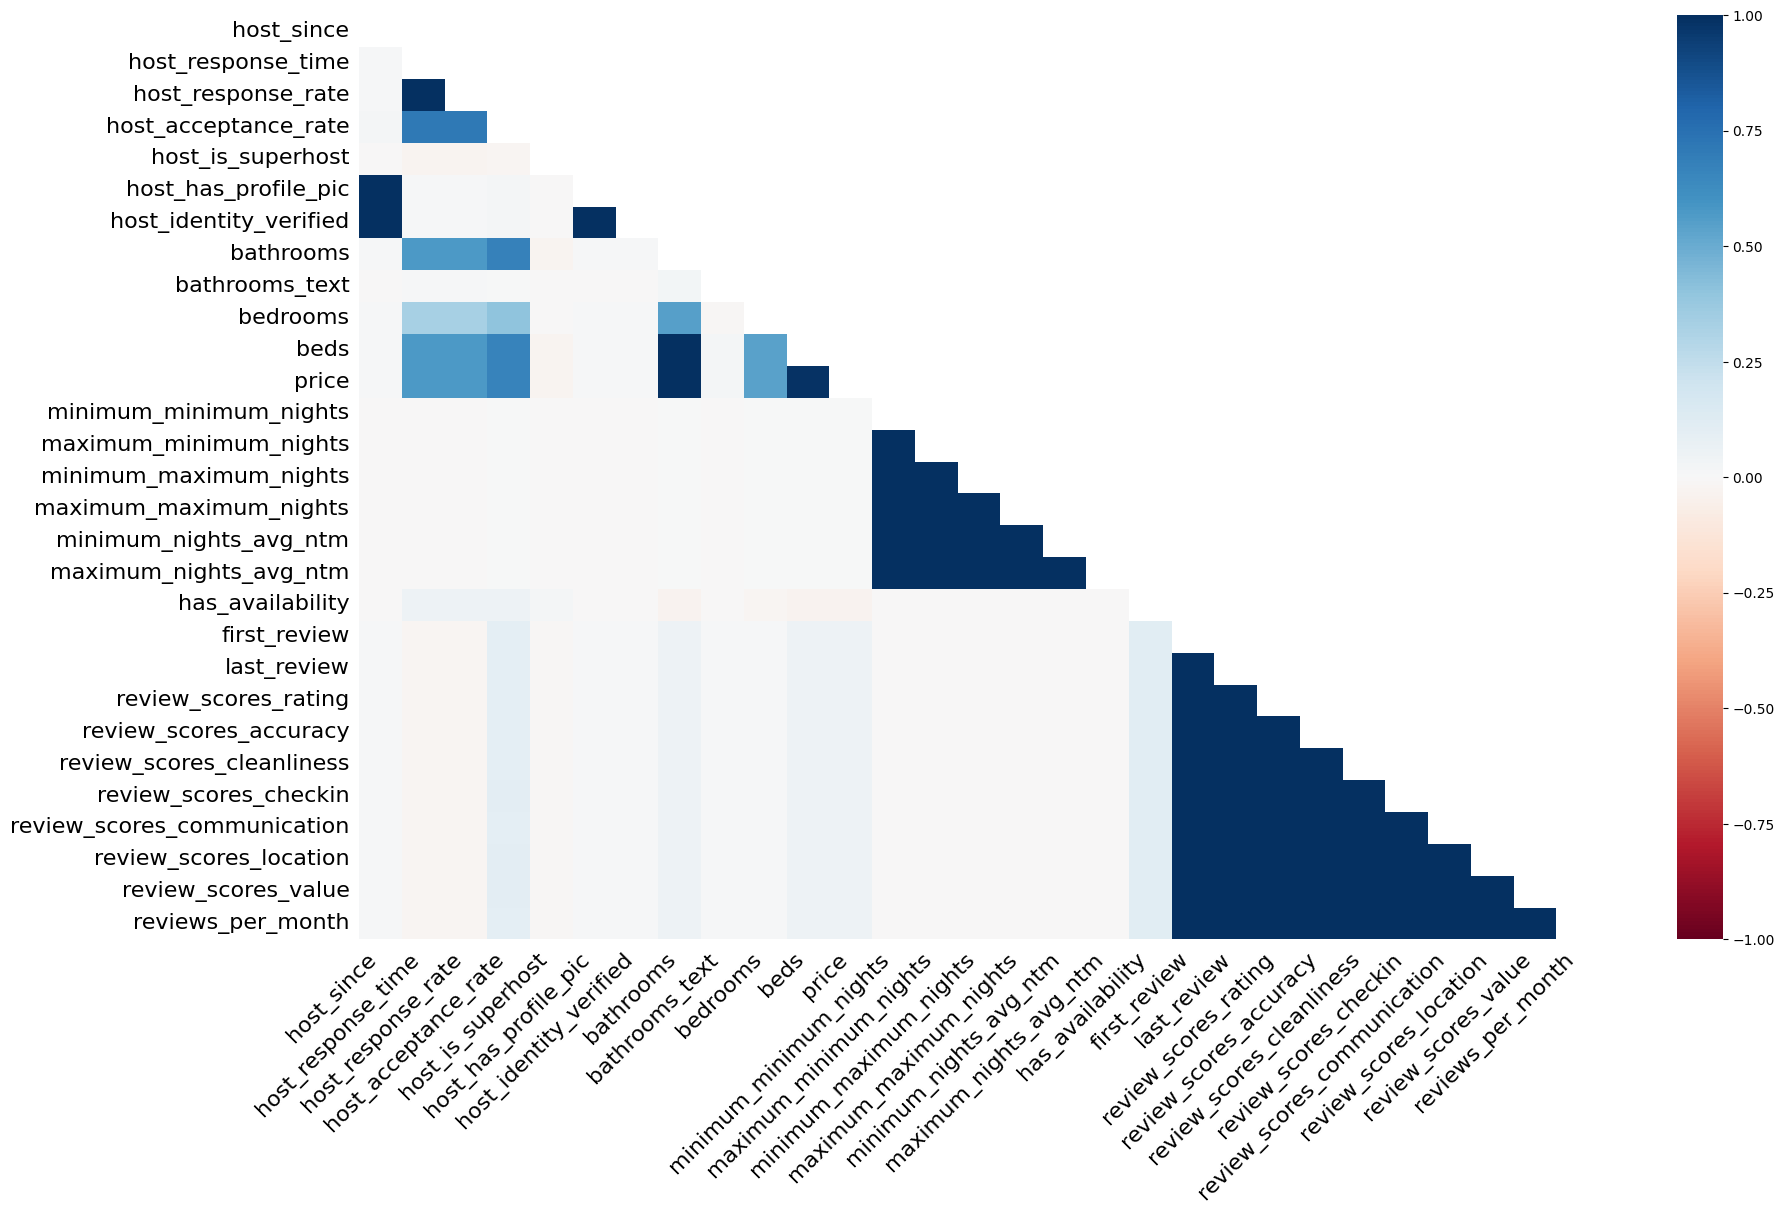

In [87]:
# Visualize the missingness matrix
msno.matrix(df2024_1)
plt.show()

# Heatmap of missingness correlation
msno.heatmap(df2024_1)
plt.show()

In [8]:
# drop missing values
columns_to_check = ['host_since', 'host_is_superhost', 'has_availability', 'calendar_updated', 'bathrooms_text','price']
threshold = 0.7  # 70% threshold for missing values

for col in columns_to_check:
    missing_proportion = df2024_1[col].isna().mean()  # Proportion of missing values
    if missing_proportion > threshold:
        # Drop the column
        df2024_1.drop(col, axis=1, inplace=True)
    elif missing_proportion > 0:
        # Drop rows with missing values in this column
        df2024_1 = df2024_1.dropna(subset=[col])

In [9]:
# 确定price还在
df2024_1.price.describe()

count       23914
unique        913
top       $100.00
freq          645
Name: price, dtype: object

In [10]:
# fill missing values
# numeric columns
numeric_cols = df2024_1.select_dtypes(include=['number']).columns

# Then identify those numeric columns that have missing values
numeric_cols_with_missing = numeric_cols[df2024_1[numeric_cols].isna().any(axis=0)]

# Now iterate over those columns and print min/max if the minimum is not zero, then fill NaN with 0
for col in numeric_cols_with_missing:
    if df2024_1[col].min(skipna=True) != 0:
        print(f"{col} - Min: {df2024_1[col].min()}, Max: {df2024_1[col].max()}")
        df2024_1[col].fillna(0, inplace=True)

minimum_minimum_nights - Min: 1.0, Max: 500.0
maximum_minimum_nights - Min: 1.0, Max: 1000.0
minimum_maximum_nights - Min: 1.0, Max: 2147483647.0
maximum_maximum_nights - Min: 2.0, Max: 2147483647.0
minimum_nights_avg_ntm - Min: 1.0, Max: 956.8
maximum_nights_avg_ntm - Min: 2.0, Max: 2147483647.0
review_scores_rating - Min: 1.0, Max: 5.0
review_scores_accuracy - Min: 1.0, Max: 5.0
review_scores_cleanliness - Min: 1.0, Max: 5.0
review_scores_checkin - Min: 1.0, Max: 5.0
review_scores_communication - Min: 1.0, Max: 5.0
review_scores_location - Min: 1.0, Max: 5.0
review_scores_value - Min: 1.0, Max: 5.0
reviews_per_month - Min: 0.01, Max: 78.25


In [11]:
# fill missing values
# review columns

# 将字符串转换为Datetime
df2024_1['last_scraped'] = pd.to_datetime(df2024_1['last_scraped'])
for col in ['host_since', 'first_review', 'last_review']:
    # Ensure that the column is in datetime format
    df2024_1[col] = pd.to_datetime(df2024_1[col], errors='coerce')  # Use 'coerce' to handle any parsing errors

# # 添加缺失值标记列
# for col in ['first_review', 'last_review', 'review_scores_rating',
#             'review_scores_accuracy', 'review_scores_cleanliness',
#             'review_scores_checkin', 'review_scores_communication',
#             'review_scores_location', 'review_scores_value']:

#     missing_col_name = col + '_missing'  # 新的缺失值标记列名
#     df2024_1[missing_col_name] = df2024_1[col].isna().astype(int)  # 如果缺失则标记为1

# 对于日期列，选择一个填充值，并转换为天数
date_fill_value = df2024_1['first_review'].min(skipna=True)
df2024_1['first_review'].fillna(date_fill_value, inplace=True)
df2024_1['last_review'].fillna(date_fill_value, inplace=True)

# 转换日期列为天数
df2024_1['days_since_first_review'] = (df2024_1['last_scraped'] - pd.to_datetime(df2024_1['first_review'])).dt.days
df2024_1['days_since_last_review'] = (df2024_1['last_scraped'] - pd.to_datetime(df2024_1['last_review'])).dt.days
df2024_1['days_since_host_since'] = (df2024_1['last_scraped'] - pd.to_datetime(df2024_1['host_since'])).dt.days
df2024_1['days_since_first_review'] = df2024_1['days_since_first_review'].astype(float)
df2024_1['days_since_last_review'] = df2024_1['days_since_last_review'].astype(float)
df2024_1['days_since_host_since'] = df2024_1['days_since_host_since'].astype(float)

# 对于评分类列，使用中性值填充缺失值
for score_col in ['review_scores_rating', 'review_scores_accuracy',
                  'review_scores_cleanliness', 'review_scores_checkin',
                  'review_scores_communication', 'review_scores_location',
                  'review_scores_value']:
    neutral_value = 2.5
    df2024_1[score_col].fillna(neutral_value, inplace=True)

df2024_1.drop(['last_scraped','first_review', 'last_review','host_since'],axis=1,inplace=True)
# host_since缺失值已经在前面被删掉

In [12]:
# string to float
df2024_1['host_acceptance_rate'] = df2024_1['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
df2024_1['host_response_rate'] = df2024_1['host_response_rate'].str.rstrip('%').astype('float') / 100.0

In [13]:
columns_to_convert = [
    'host_is_superhost',
    'host_has_profile_pic',
    'host_identity_verified',
    'has_availability',
    'instant_bookable'
]

# Assuming that 't' represents True and 'f' represents False in your dataset
bool_mapping = {'t': True, 'f': False}

for col in columns_to_convert:
    # Map the 't'/'f' values to True/False
    df2024_1[col] = df2024_1[col].map(bool_mapping)

In [14]:
# Remove both the dollar sign and commas, then convert to float
df2024_1['price'] = df2024_1['price'].replace('[\$,]', '', regex=True).astype(float)

In [15]:
missing_values_count = df2024_1.isna().sum()

# Filter and print only those columns that have non-zero missing values
non_zero_missing = missing_values_count[missing_values_count != 0]
print(non_zero_missing)

host_response_time      5466
host_response_rate      5466
host_acceptance_rate    1724
bedrooms                  46
beds                     114
dtype: int64


In [16]:
df2024_1[['host_response_rate','host_acceptance_rate','bedrooms','beds']].describe()

,host_response_rate,host_acceptance_rate,bedrooms,beds
count,18448.000000,22190.000000,23868.000000,23800.000000
mean,0.940187,0.808767,1.374141,1.685210
std,0.176757,0.268407,0.966722,1.256933
min,0.000000,0.000000,0.000000,0.000000
25%,0.990000,0.730000,1.000000,1.000000
50%,1.000000,0.940000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,2.000000
max,1.000000,1.000000,16.000000,42.000000


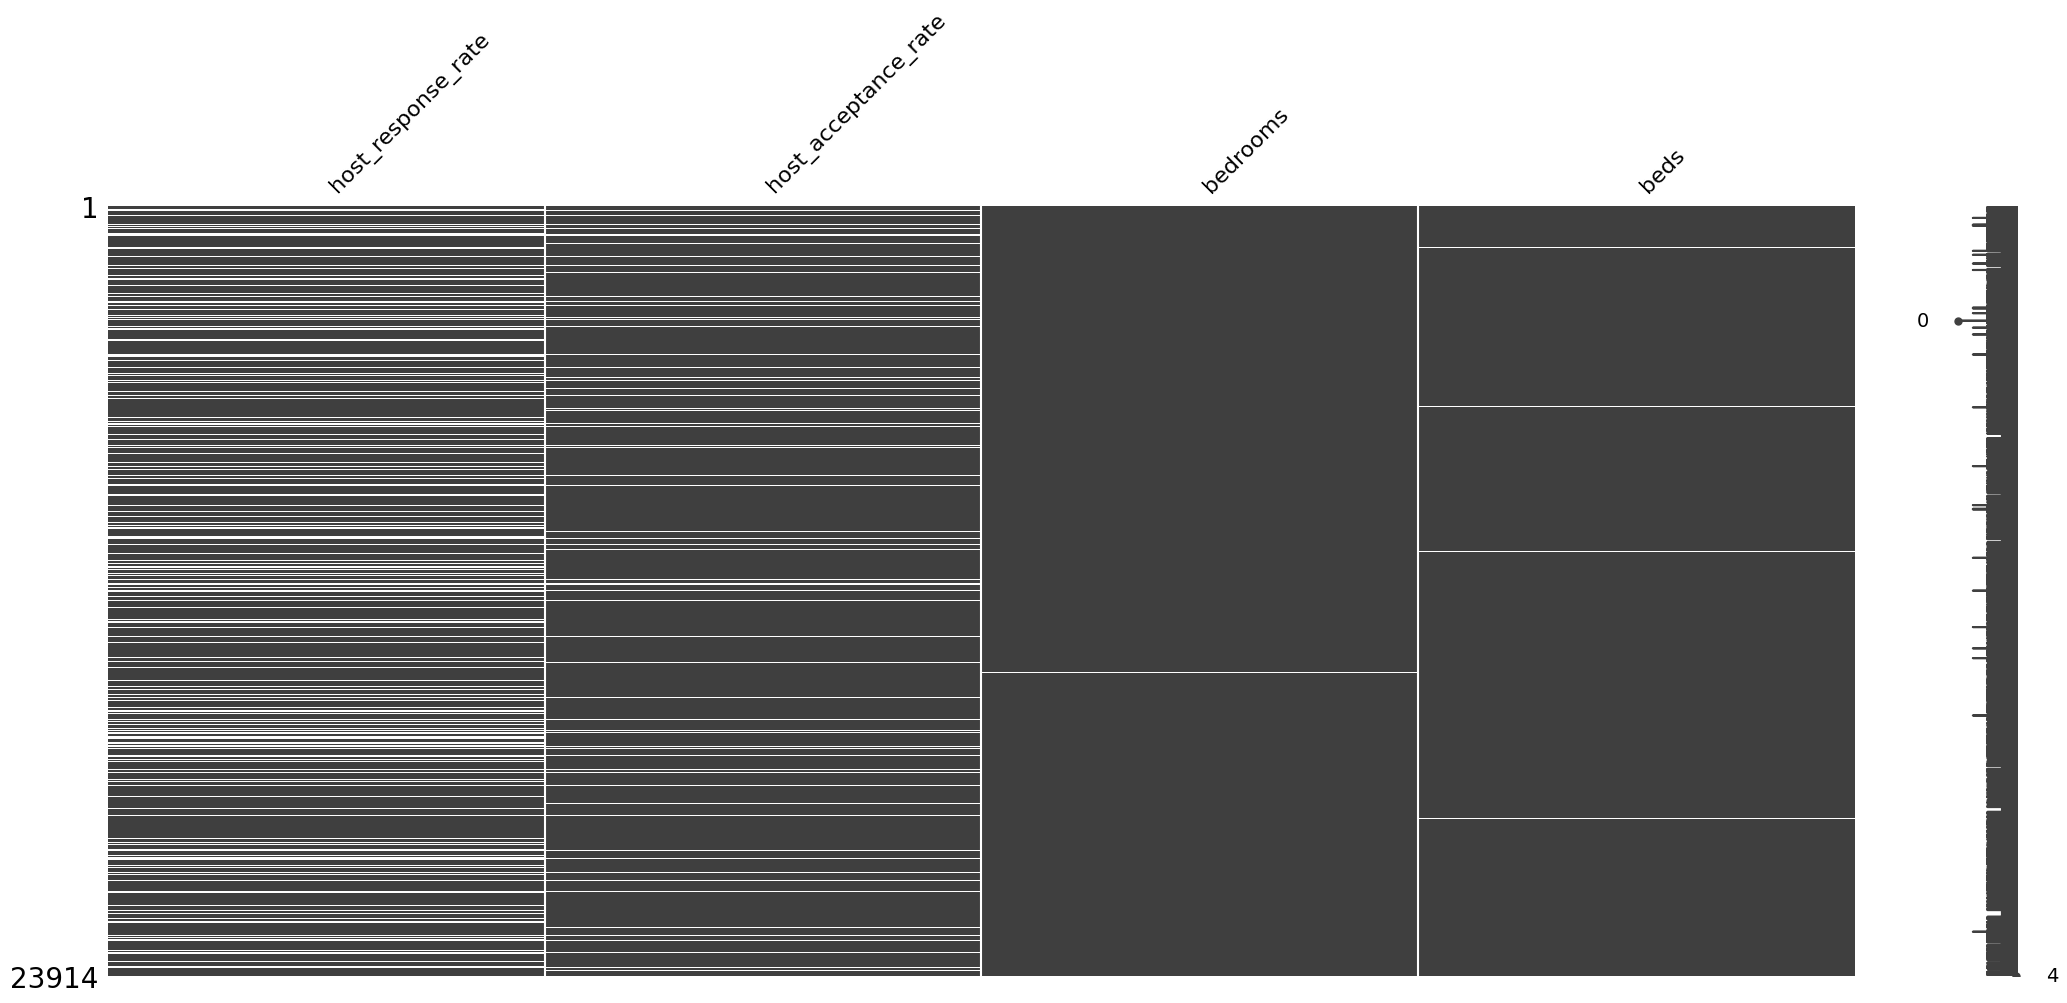

ValueError: could not convert string to float: '--'

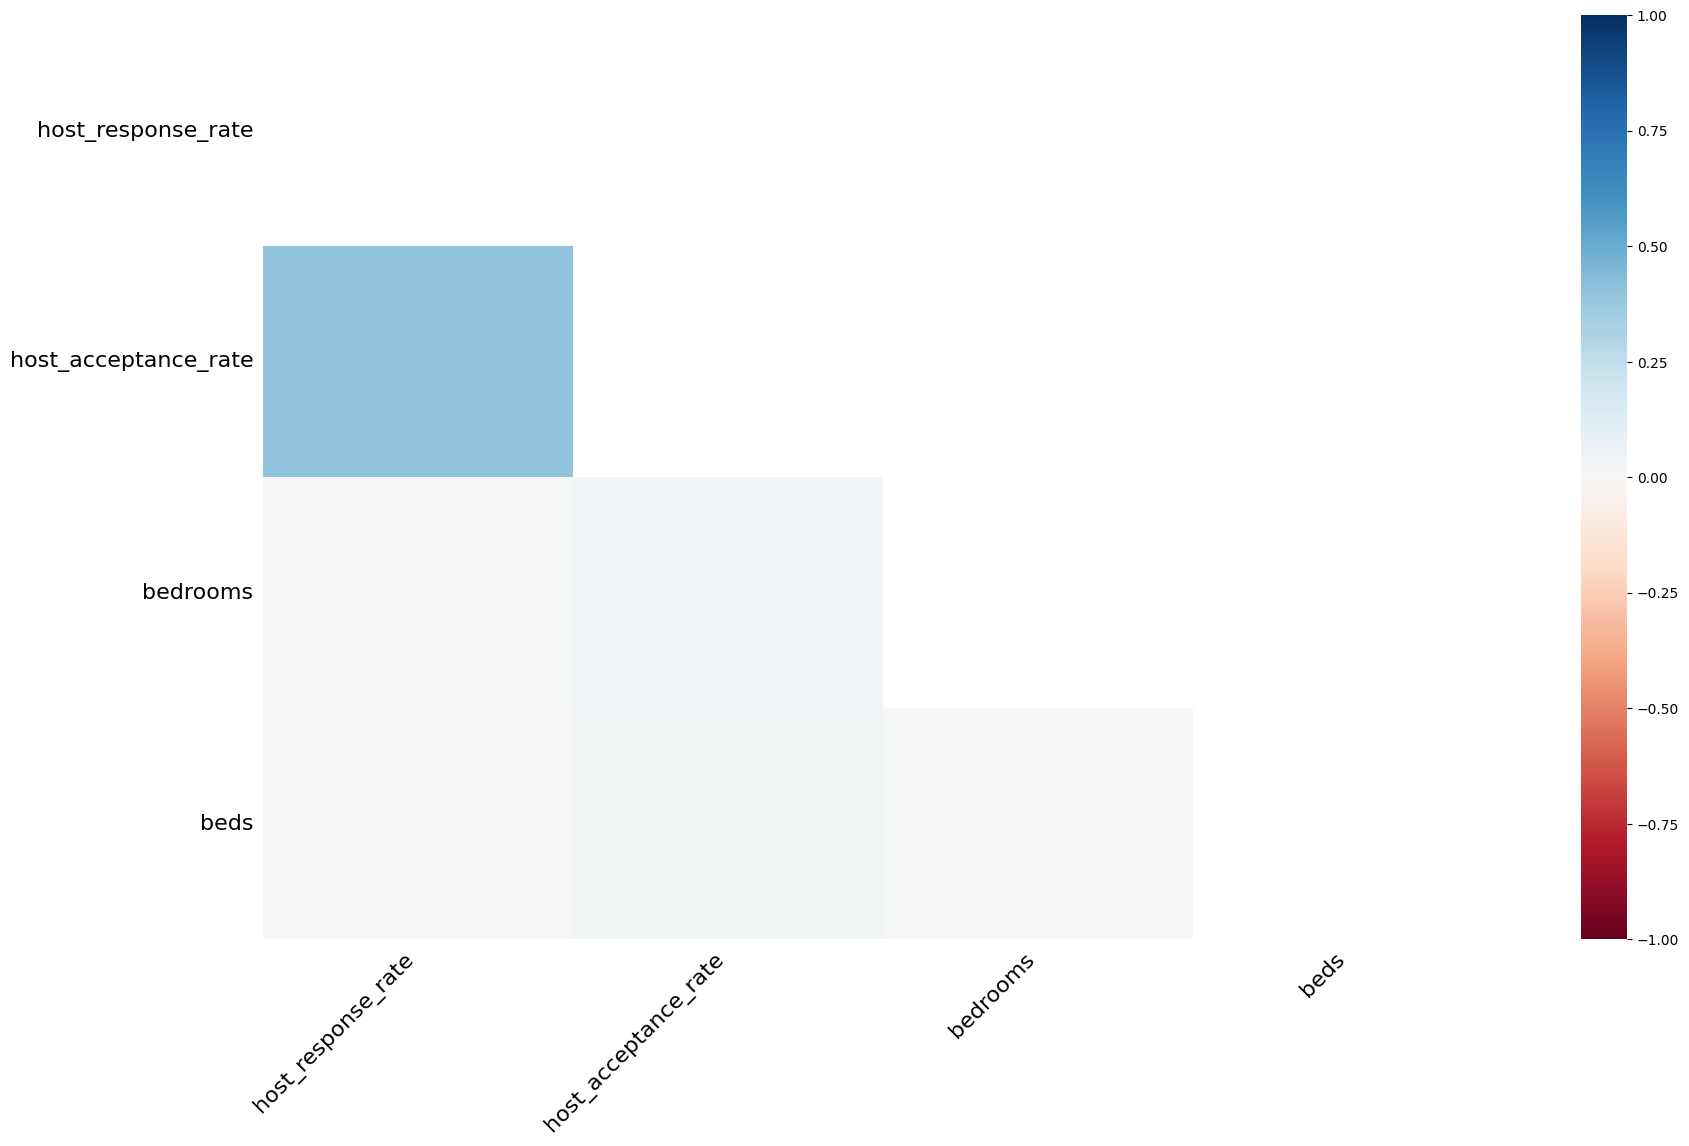

In [17]:
# Visualize the missingness matrix
msno.matrix(df2024_1[['host_response_rate','host_acceptance_rate','bedrooms','beds']])
plt.show()

# Heatmap of missingness correlation
msno.heatmap(df2024_1[['host_response_rate','host_acceptance_rate','bedrooms','beds']])
plt.show()

In [18]:
# 删除包含任何缺失值的行
df2024_1 = df2024_1.dropna(subset=['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds'])

In [19]:
df2024_1.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calc

# Feature Engineering

## multicollinearity

In [20]:
review_score_columns = [
    'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]
df2024_1['review_score_mean'] = df2024_1[review_score_columns].mean(axis=1)
df2024_1.drop(review_score_columns,axis=1,inplace=True)

In [21]:
multicollinearity_drop_columns=[
    'maximum_nights_avg_ntm','availability_60','availability_90','calculated_host_listings_count','minimum_nights_avg_ntm','days_since_first_review','minimum_minimum_nights'
]
df2024_1.drop(multicollinearity_drop_columns,axis=1,inplace=True)

In [22]:
# drop outliers
numeric_cols = df2024_1.select_dtypes(include=['number'])
isolation_forest = IsolationForest(random_state = 88)

# rf_data_copy = df2024_1.copy()

# Predict the outliers, where -1 indicates an anomaly
A = isolation_forest.fit_predict(numeric_cols)

# Retrieve the indices of the rows where anomalies are located
outlier_indices = np.where(A == -1)[0]
# Drop the outliers from the dataframe
numeric_cols = numeric_cols.drop(numeric_cols.index[outlier_indices])

In [23]:
numeric_cols=numeric_cols[numeric_cols.price<100000]

In [24]:
numeric_cols.shape

(16406, 24)

In [25]:
# numeric_cols = df2024_1.select_dtypes(include=['number'])
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
# 计算VIF
vif_data = pd.DataFrame()
vif_data['feature'] = numeric_cols.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]

In [26]:
# 严重多重共线性
has_multiL_problem=vif_data[vif_data['VIF']>=10]
display(has_multiL_problem)

,feature,VIF
0,host_response_rate,37.204860
1,host_acceptance_rate,19.016753
21,days_since_last_review,11.746381
23,review_score_mean,33.729203


## Encode Labels

In [27]:
# 将amenities的每个列表长度计算出来，作为新的特征
df2024_1['amenities_count'] = df2024_1['amenities'].apply(lambda x: len(eval(x)))

In [28]:
from sklearn.preprocessing import MultiLabelBinarizer

# 首先，确保amenities里的每个项都是列表
df2024_1['amenities'] = df2024_1['amenities'].apply(eval)

# 使用MultiLabelBinarizer进行one-hot编码
mlb = MultiLabelBinarizer()
amenities_encoded = mlb.fit_transform(df2024_1['amenities'])
amenities_df = pd.DataFrame(amenities_encoded, columns=mlb.classes_, index=df2024_1.index)

# 将新的DataFrame合并回原始DataFrame
df = pd.concat([df2024_1, amenities_df], axis=1)

# 删除原始的amenities列
df2024_1.drop('amenities', axis=1, inplace=True)

In [29]:
label_selected_cols = [
  'host_response_time',
  'bathrooms_text'
 ]
for col in df2024_1.columns:
    if col in label_selected_cols:
        label_encoder = LabelEncoder()
        df2024_1[col]=df2024_1[col].fillna('Missing')
        df2024_1[col + '_LabelEncoded'] = label_encoder.fit_transform(df2024_1[col])
        df2024_1 = df2024_1.drop(columns=[col])

In [30]:
label_selected_cols = [
  'neighbourhood_cleansed',
  'property_type',
  'room_type'
 ]
# 1. 计算中位数和平均房价的阈值
quantiles = df2024_1['price'].quantile([0.25, 0.75])
mean_price = df2024_1['price'].mean()
median_price = df2024_1['price'].median()

# 2. 创建布尔列
df2024_1['expensive_area'] = df2024_1.groupby('neighbourhood_cleansed')['price'].transform(lambda x: x.median() > quantiles[0.75])
df2024_1['cheap_area'] = df2024_1.groupby('neighbourhood_cleansed')['price'].transform(lambda x: x.median() < quantiles[0.25])
df2024_1['expensive_property_type'] = df2024_1.groupby('property_type')['price'].transform(lambda x: x.median() > quantiles[0.75])
df2024_1['cheap_property_type'] = df2024_1.groupby('property_type')['price'].transform(lambda x: x.median() < quantiles[0.25])
df2024_1['expensive_room_type'] = df2024_1.groupby('room_type')['price'].transform(lambda x: x.median() > quantiles[0.75])
df2024_1['cheap_room_type'] = df2024_1.groupby('room_type')['price'].transform(lambda x: x.median() < quantiles[0.25])

# 3. 独热编码
df2024_1 = pd.get_dummies(df2024_1, columns=label_selected_cols)

# 4. 删除True个数小于5的列
for col in df2024_1.columns:
    if df2024_1[col].dtype == 'uint8' and df2024_1[col].sum() < 10:
        df2024_1.drop(col, axis=1, inplace=True)

## Exploratory Analysis

In [14]:
#drop unnecessary columns
df2024_01.drop(['name','id','host_name','last_review','number_of_reviews_ltm', 'license'], axis=1, inplace=True)
df2024_01.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [15]:
#select the number columns
numeric_df = df2024_01.select_dtypes(include=[np.number])

<Axes: >

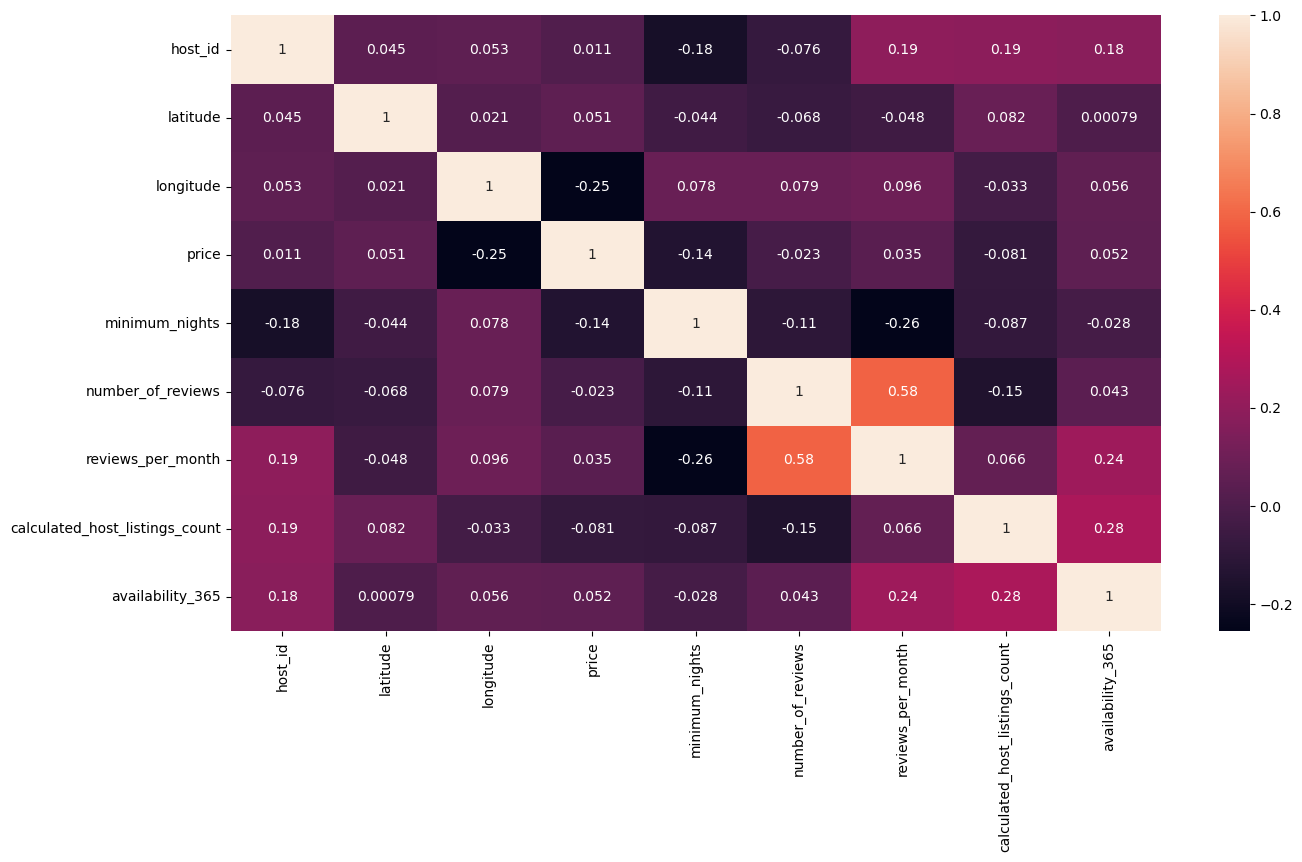

In [16]:
corr = numeric_df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

Text(0.5, 1.0, 'Neighbourhood Group')

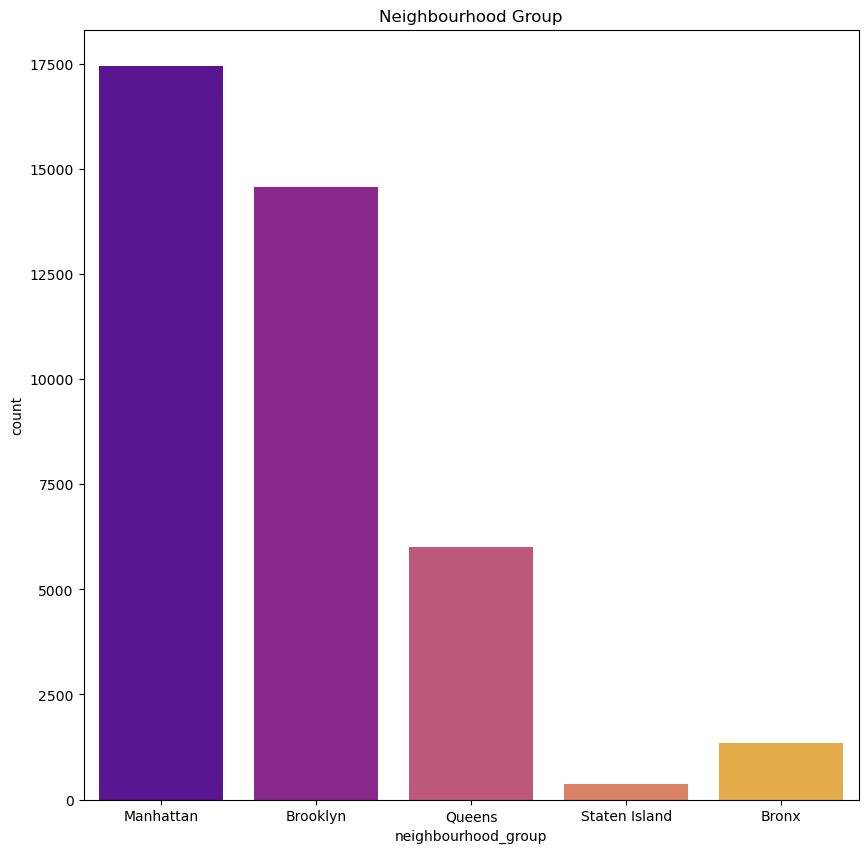

In [17]:
sns.countplot(x='neighbourhood_group', data=df2024_01, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

Text(0.5, 1.0, 'Neighbourhood')

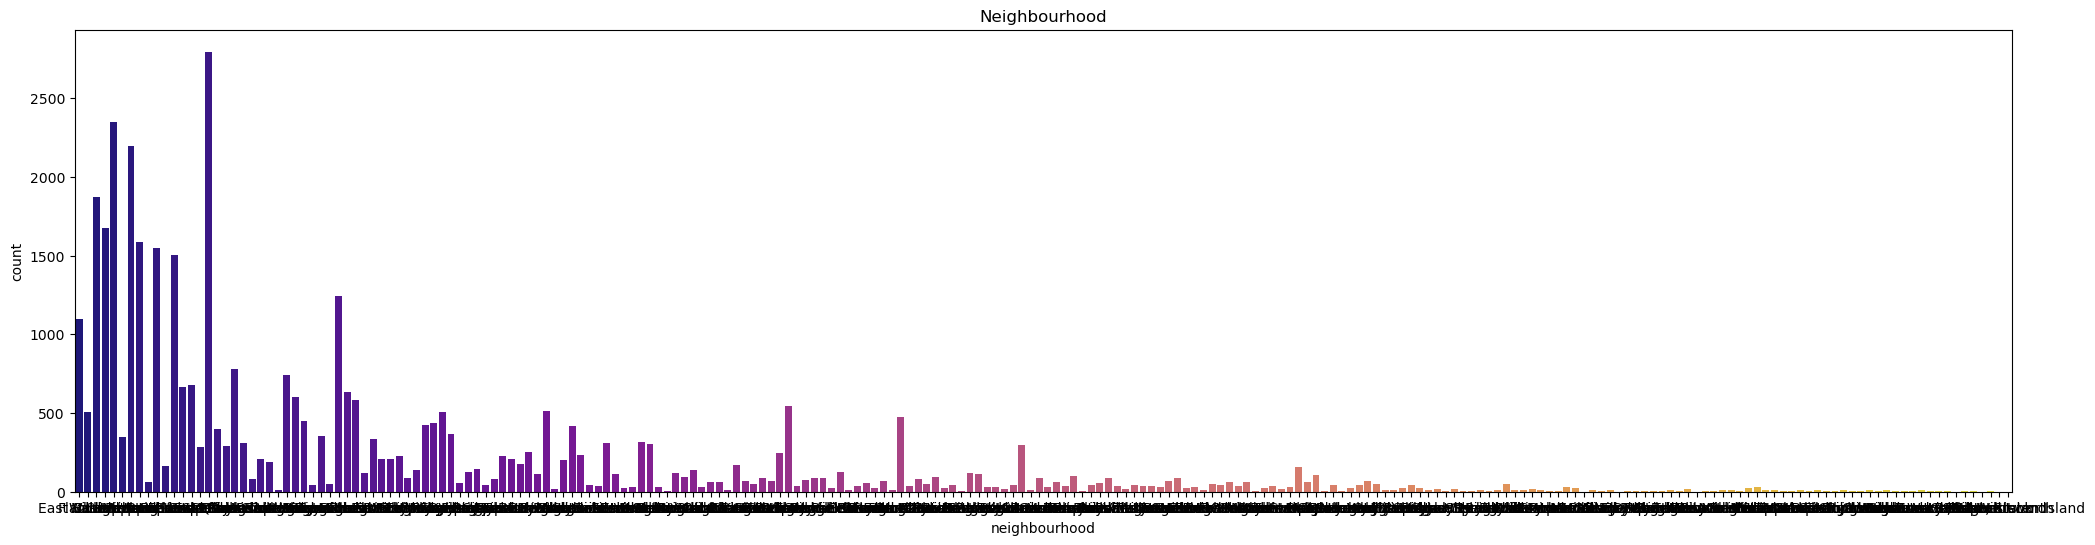

In [18]:
sns.countplot(x='neighbourhood', data=df2024_01, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

In [19]:
df2024_01['neighbourhood'] = df2024_01['neighbourhood'].astype(str)

Text(0.5, 1.0, 'Restaurants delivering online or Not')

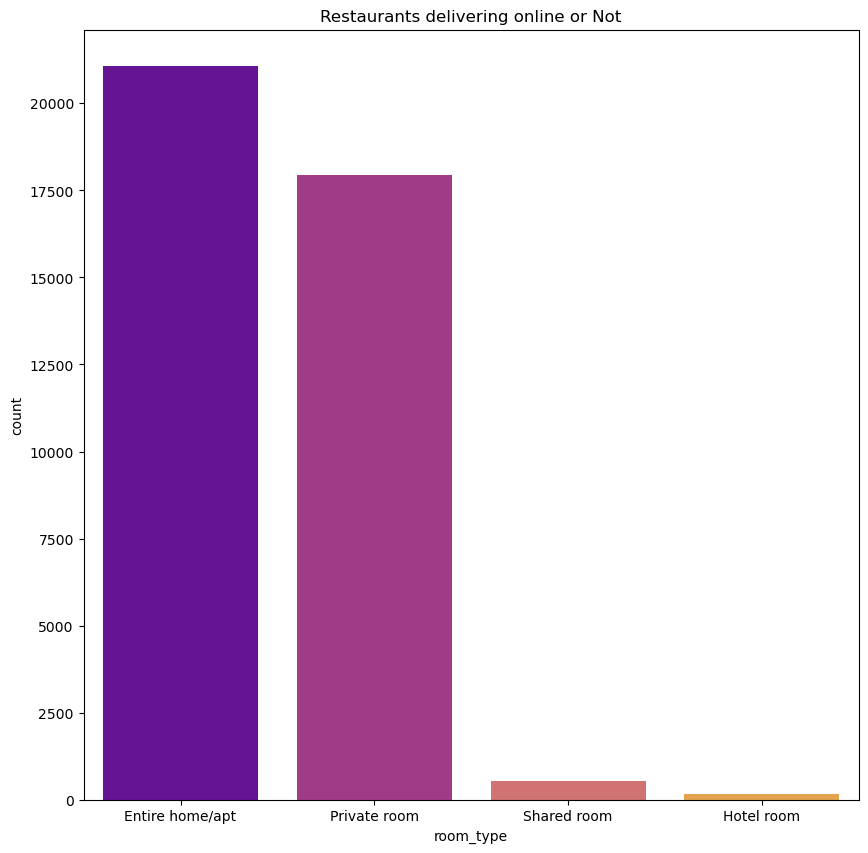

In [20]:
#Restaurants delivering Online or not
sns.countplot(x='room_type', data=df2024_01, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

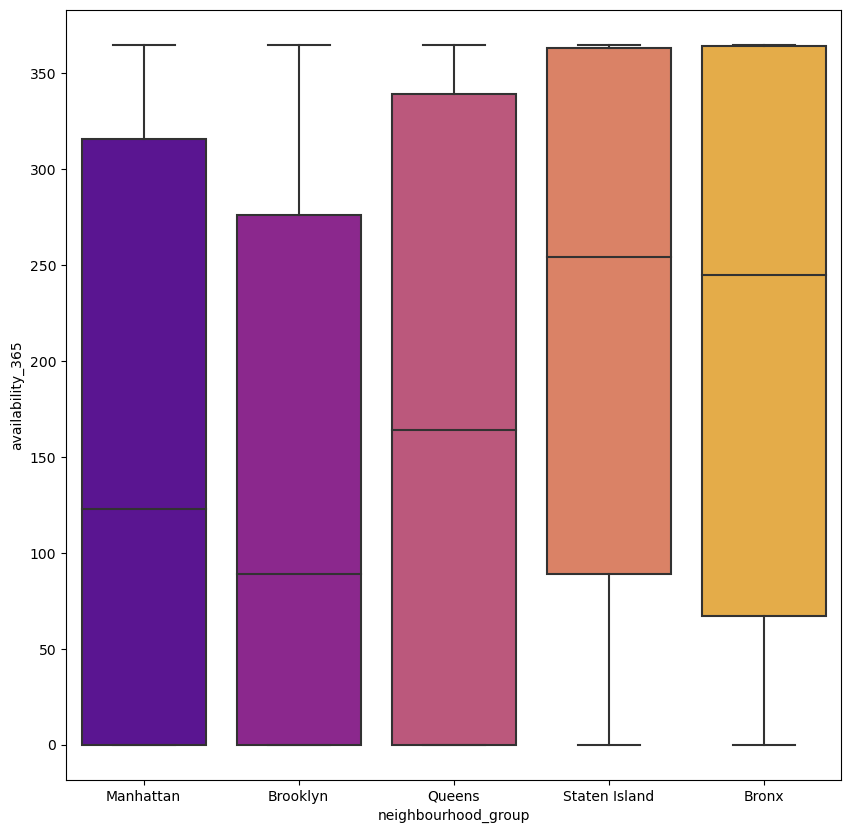

In [21]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df2024_01, x='neighbourhood_group',y='availability_365',palette='plasma')

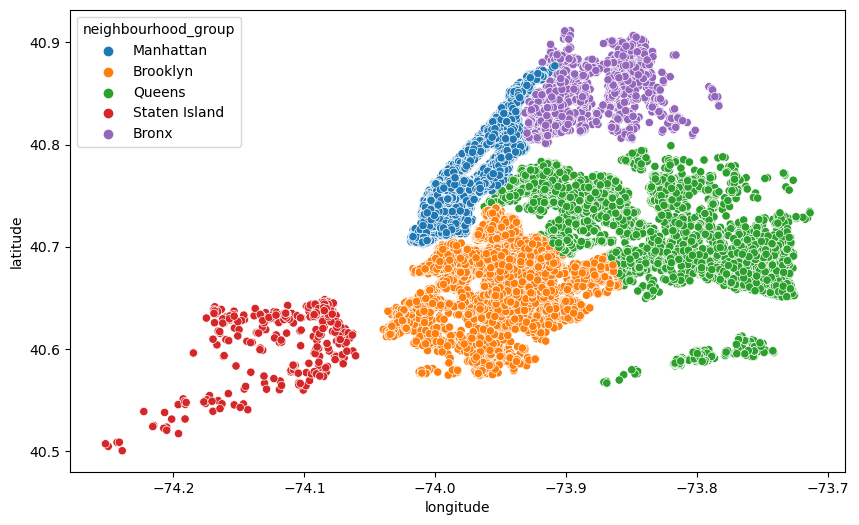

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df2024_01['longitude'], y=df2024_01['latitude'], hue=df2024_01['neighbourhood_group'])
plt.ioff()

## Outlies

In [31]:
# drop outliers
isolation_forest = IsolationForest(random_state = 88)

# rf_data_copy = df2024_1.copy()

# Predict the outliers, where -1 indicates an anomaly
A = isolation_forest.fit_predict(df2024_1)

# Retrieve the indices of the rows where anomalies are located
outlier_indices = np.where(A == -1)[0]
# Drop the outliers from the dataframe
df2024_1 = df2024_1.drop(df2024_1.index[outlier_indices])

In [32]:
df2024_1=df2024_1[df2024_1.price<100000]

In [33]:
df2024_1.shape

(18042, 314)

# Models

- 未进行特征选择的模型测试：(模型：xg_reg，rf)
- 使用随机森林进行特征选择后的模型(模型：best_rf_XGB,best_rf_rf)
- 使用XGBoost进行特征选择后的模型(模型：best_xgb_XGB,best_xgb_rf)
- PCA降维后的模型(模型：best_pca_XGB,best_pca_rf)



## Time Series

In [24]:
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


In [25]:
# Convert 'last_review' column to datetime type
df['last_review'] = pd.to_datetime(df['last_review'])

# Set 'last_review' as index
df.set_index('last_review', inplace=True)

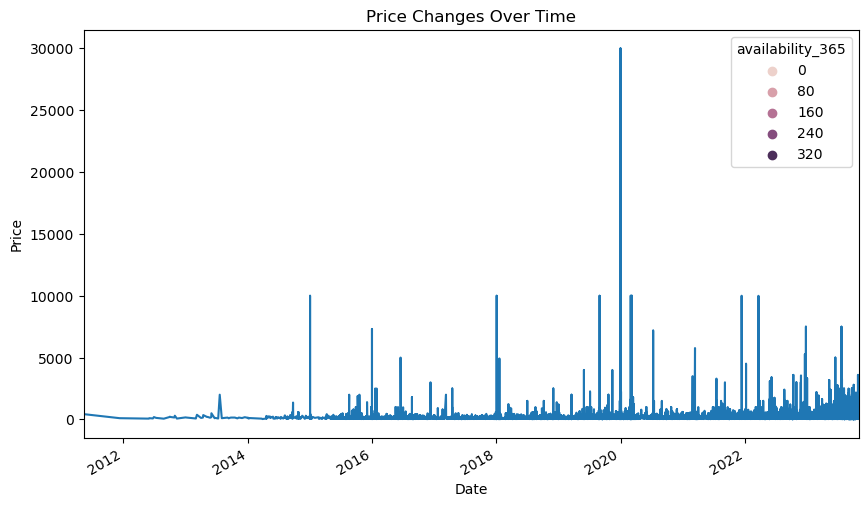

In [26]:
# Plot price changes over time
df['price'].plot()
plt.title('Price Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

# Set the range of the x-axis to the minimum and maximum dates of the dataset
plt.xlim(df.index.min(), df.index.max())

plt.show()

In [27]:
# Confirm whether 'last_review' is a column of DataFrame
if 'last_review' in df.columns:
    # If 'last_review' is a column, remove NaT by column
    df.dropna(subset=['last_review'], inplace=True)
    # Convert 'last_review' column to DatetimeIndex
    df['last_review'] = pd.to_datetime(df['last_review'])
    df.set_index('last_review', inplace=True)
else:
    # If 'last_review' is already an index
    df.index = pd.to_datetime(df.index)  # Make sure the index is of DatetimeIndex type
    df = df[~df.index.isna()]  # Delete rows with index NaT

# Aggregate duplicate date data
if df.index.duplicated().any():
    df = df.groupby(df.index).agg({'price': 'mean'})  # Aggregate using average of prices

# Try setting it to daily frequency
df = df.asfreq('D', method='pad')  # Use forward padding to handle missing dates

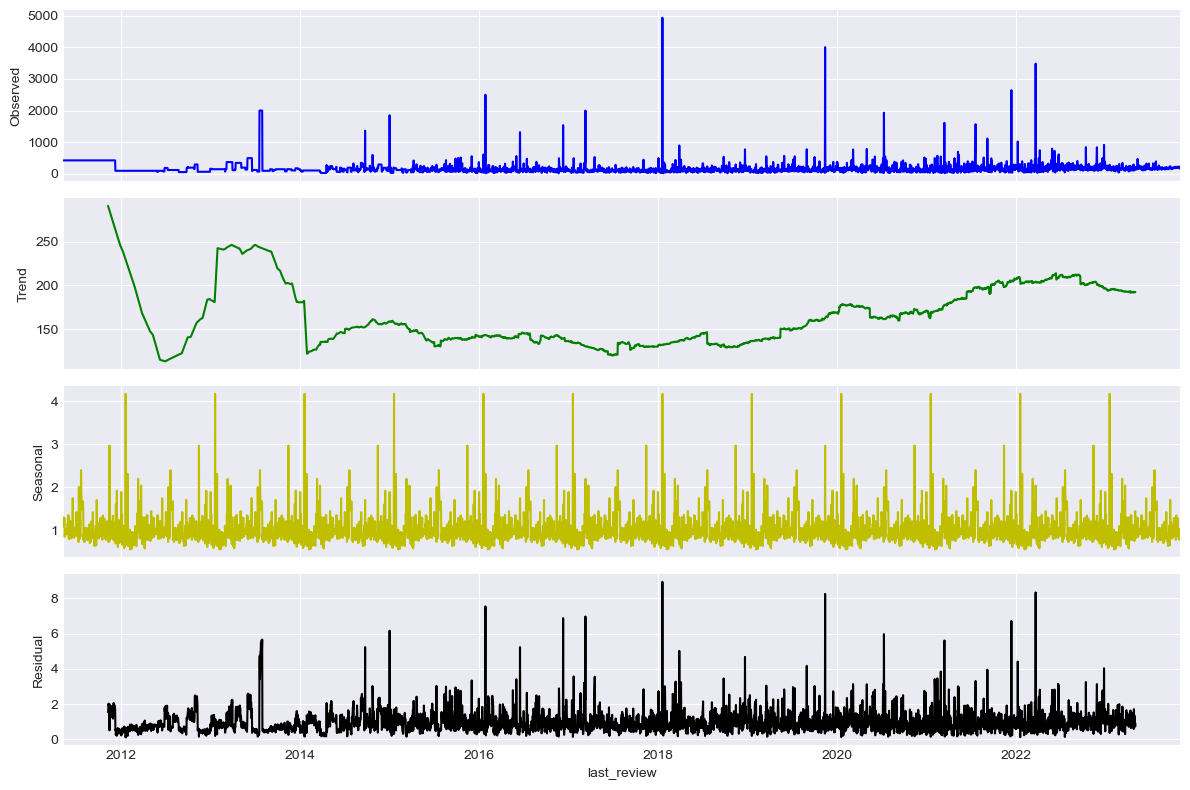

In [28]:
# Try a multiplicative model for seasonal decomposition
result = seasonal_decompose(df['price'], model='multiplicative', period=365)

# Draw an exploded diagram using the method
plt.style.use('seaborn-darkgrid')
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(12, 8))

result.observed.plot(ax=axes[0], legend=False, color='b')
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2], legend=False, color = 'y')
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3], legend=False, color='k')
axes[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

In [35]:
adf_test = adfuller(df['price'])

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -15.746171
p-value: 0.000000


### Forecast for the next 180 days, based on data from 2012 to new date

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.66411D+00    |proj g|=  1.25775D-02


 This problem is unconstrained.



At iterate    5    f=  6.66390D+00    |proj g|=  1.65383D-03

At iterate   10    f=  6.66050D+00    |proj g|=  2.99171D-02

At iterate   15    f=  6.61362D+00    |proj g|=  3.06373D-02

At iterate   20    f=  6.61172D+00    |proj g|=  9.04690D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     23      1     0     0   9.047D-06   6.612D+00
  F =   6.6117163317479397     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


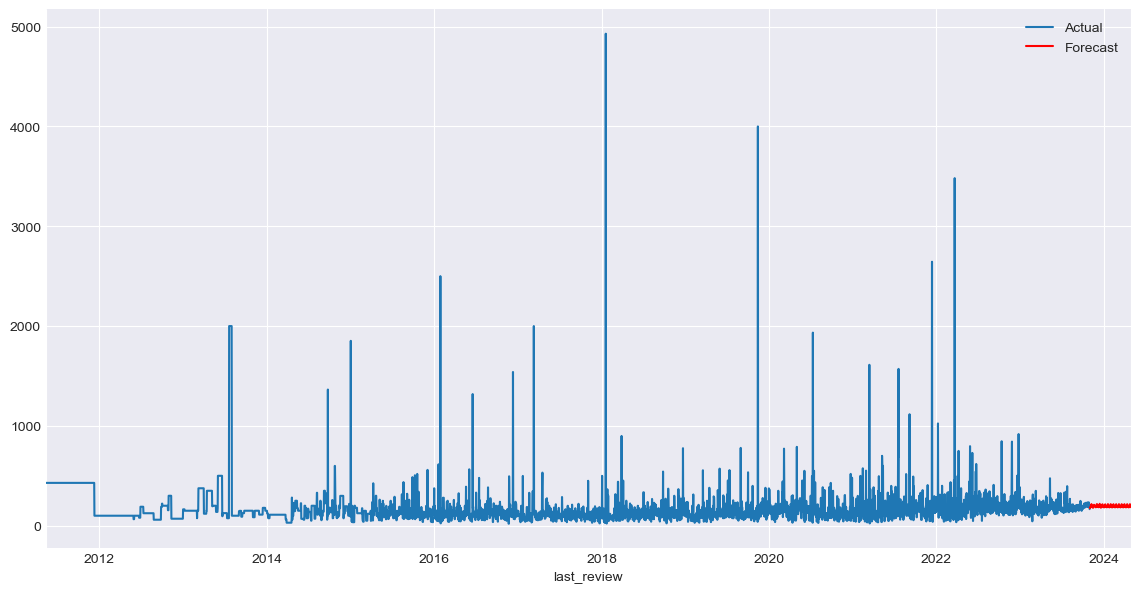

In [36]:
model = SARIMAX(df['price'],
                order=(2, 0, 0),
                seasonal_order=(3, 1, 0, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit()
forecast_result = model_fit.get_forecast(steps=180)

forecast_values1 = forecast_result.predicted_mean

df['price'].plot(label='Actual', figsize=(14, 7))
forecast_values1.plot(label='Forecast', color='red')
plt.legend()
plt.show()

Forecasted Prices for Next 180 Days:
2023-11-02    176.793905
2023-11-03    180.255685
2023-11-04    185.538140
2023-11-05    184.499733
2023-11-06    190.584576
                 ...    
2024-04-25    215.660295
2024-04-26    200.449821
2024-04-27    198.031452
2024-04-28    196.848864
2024-04-29    186.145599
Freq: D, Name: predicted_mean, Length: 180, dtype: float64

95% Confidence Intervals for the Forecast:
            lower price  upper price
2023-11-02          0.0   556.368793
2023-11-03          0.0   572.101032
2023-11-04          0.0   588.761830
2023-11-05          0.0   589.943033
2023-11-06          0.0   597.024391
...                 ...          ...
2024-04-25          0.0   916.969688
2024-04-26          0.0   901.760177
2024-04-27          0.0   899.342122
2024-04-28          0.0   898.159641
2024-04-29          0.0   887.456411

[180 rows x 2 columns]


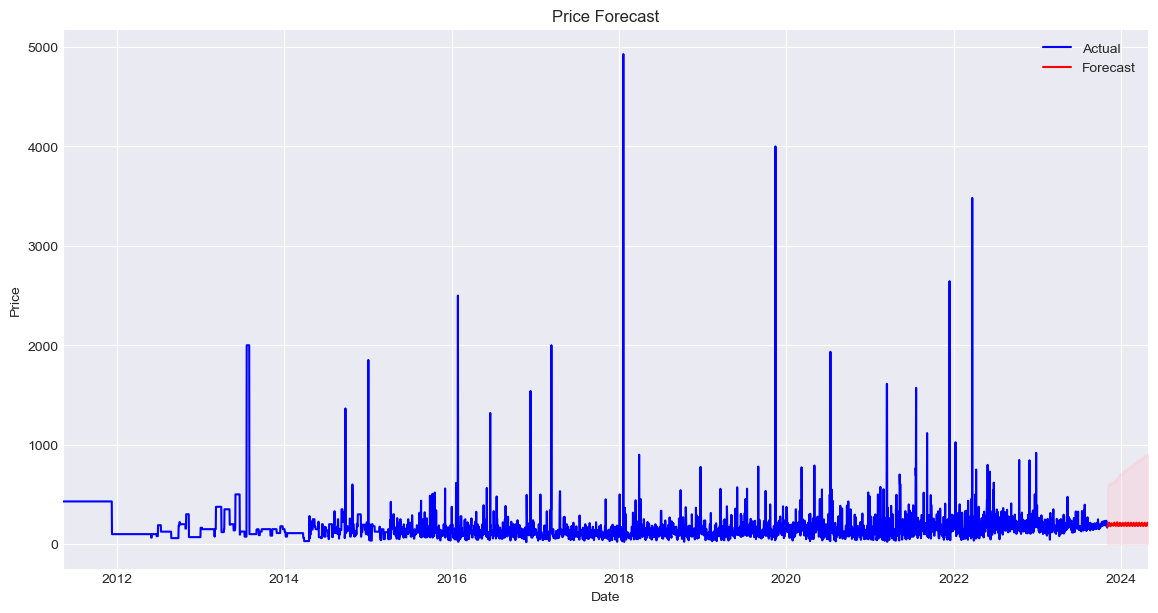

In [37]:
forecast_values1 = forecast_result.predicted_mean
forecast_ci1 = forecast_result.conf_int()

forecast_ci1['lower price'] = forecast_ci1.iloc[:, 0].clip(lower=0)
forecast_ci1['upper price'] = forecast_ci1.iloc[:, 1]

print("Forecasted Prices for Next 180 Days:")
print(forecast_values1)

print("\n95% Confidence Intervals for the Forecast:")
print(forecast_ci1)

plt.figure(figsize=(14, 7))
df['price'].plot(label='Actual', color='blue')
forecast_values1.plot(label='Forecast', color='red')
plt.fill_between(forecast_values1.index,
                 forecast_ci1['lower price'],
                 forecast_ci1['upper price'], color='pink', alpha=0.3)
plt.title('Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Forecast for the next 180 days, based on data from 2022 to new date

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.17253D+00    |proj g|=  1.85265D-02

At iterate    5    f=  6.17207D+00    |proj g|=  2.91315D-03

At iterate   10    f=  6.16764D+00    |proj g|=  5.62404D-02

At iterate   15    f=  6.14156D+00    |proj g|=  1.92317D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     22      1     0     0   1.466D-06   6.141D+00
  F =   6.1414134532451499     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


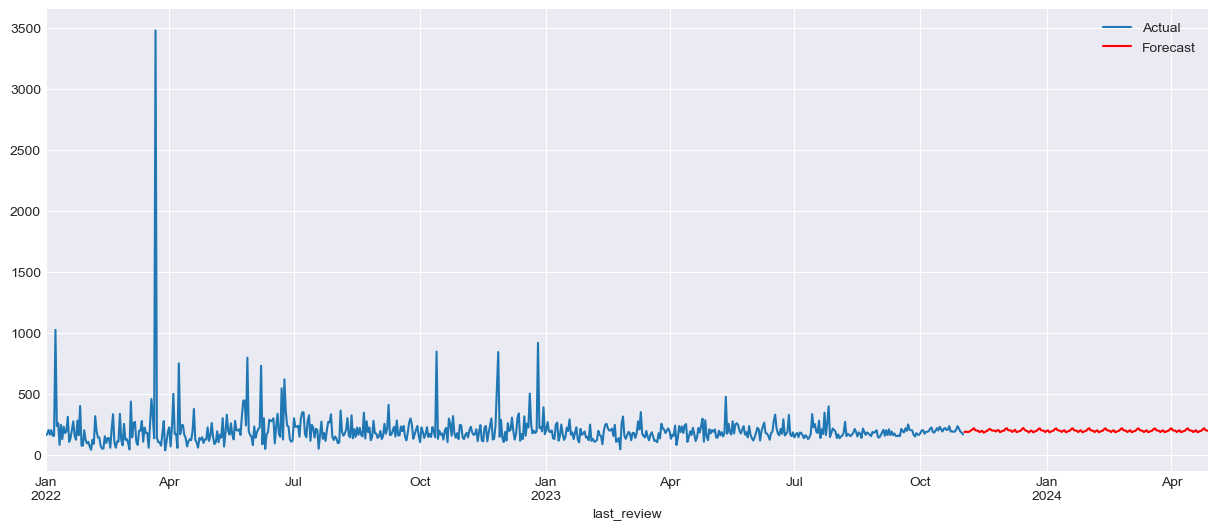

In [38]:
start_date = '2022-01'
end_date = df.index[-1]
mask = (df.index >= start_date) & (df.index <= end_date)
df_subset = df.loc[mask]

sarimax_model = SARIMAX(df_subset['price'],
                        order=(2, 0, 0),
                        seasonal_order=(3, 1, 0, 12),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit()
last_known_date = df.index[-1]
forecast_steps = 180
forecast = sarimax_result.get_forecast(steps=forecast_steps)

forecast_values = forecast.predicted_mean

last_known_date = df_subset.index[-1]
forecast_dates = pd.date_range(start=last_known_date, periods=forecast_steps, freq='D')

forecast_series = pd.Series(forecast_values, index=forecast_dates)

df_subset['price'].plot(label='Actual', figsize=(15, 6))
forecast_series.plot(label='Forecast', color='red')
plt.legend()
plt.show()

Forecasted Prices for Next 180 Days:
2023-11-02    185.183593
2023-11-03    189.597507
2023-11-04    187.029997
2023-11-05    186.463891
2023-11-06    191.551713
                 ...    
2024-04-25    216.590126
2024-04-26    201.194446
2024-04-27    197.766111
2024-04-28    196.176215
2024-04-29    185.261112
Freq: D, Name: predicted_mean, Length: 180, dtype: float64

95% Confidence Intervals for the Forecast:
            lower price  upper price
2023-11-02          0.0   546.833377
2023-11-03          0.0   551.279578
2023-11-04          0.0   549.093427
2023-11-05          0.0   548.527592
2023-11-06          0.0   553.616225
...                 ...          ...
2024-04-25          0.0   880.097082
2024-04-26          0.0   864.701402
2024-04-27          0.0   861.273068
2024-04-28          0.0   859.683172
2024-04-29          0.0   848.768068

[180 rows x 2 columns]


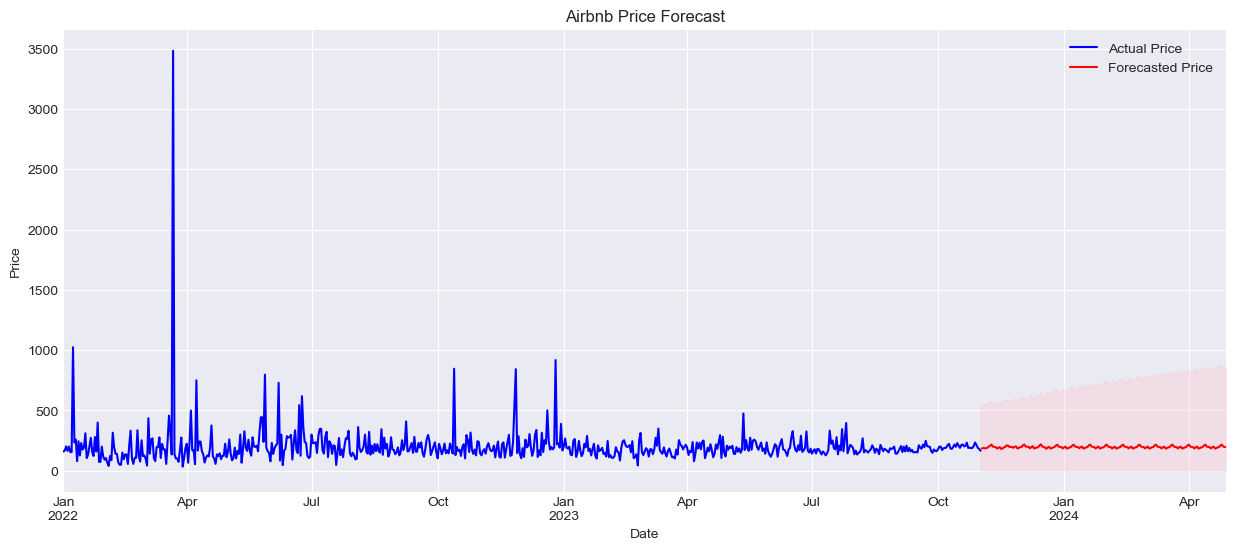

In [40]:
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()
forecast_ci['lower price'] = forecast_ci.iloc[:, 0].clip(lower=0)
forecast_ci['upper price'] = forecast_ci.iloc[:, 1]

print("Forecasted Prices for Next 180 Days:")
print(forecast_values)

print("\n95% Confidence Intervals for the Forecast:")
print(forecast_ci)

last_known_date = df_subset.index[-1]
forecast_dates = pd.date_range(start=last_known_date, periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast_values, index=forecast_dates)

plt.figure(figsize=(15, 6))
df_subset['price'].plot(label='Actual Price', color='blue')
forecast_series.plot(label='Forecasted Price', color='red')
plt.fill_between(forecast_series.index,
                 forecast_ci['lower price'],
                 forecast_ci['upper price'], color='pink', alpha=0.3)
plt.title('Airbnb Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Standardization

In [34]:
# X = df2024_1.drop(['price'],axis=1)
features = df2024_1.drop(['price'], axis=1)  # 选择特征列
scaler = preprocessing.StandardScaler().fit(features)  # 拟合scaler

# 使用拟合的scaler来变换数据
X_scaled = scaler.transform(features)

# 创建一个新的DataFrame，用变换后的数据和原来的列名
X = pd.DataFrame(X_scaled, columns=features.columns)
y = np.log(df2024_1[['price']])
# y = df2024_1[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [35]:
from sklearn.metrics import mean_absolute_percentage_error

def scores(X_train, X_test, y_train, y_test, model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # 计算R2
    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_test_pred)
    # 计算训练集上的MSE和RMSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    # 计算测试集上的MSE和RMSE
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    # 计算训练集和测试集上的MAPE
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

    print(f"Train R2 score: {train_score}, Test R2 score {test_score}")
    print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
    print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
    print(f"Train MAPE: {train_mape}, Test MAPE: {test_mape}")

# 用你的模型实例替换'model'
# scores(X_train, X_test, y_train, y_test, model)


In [36]:
def n_r2score_plot(estimators,mod,X_train, X_test, y_train, y_test):
#     estimators: a list of number
#     mod: 0-XGBoost, 1 - random forest

    train_scores = []
    test_scores = []
    for n in estimators:
        if mod==1:
            model = RandomForestRegressor(n_estimators=n, random_state=42,n_jobs=-1)
        else:
            model = xgb.XGBRegressor(n_estimators=n, random_state=42,n_jobs=-1)
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        train_scores.append(r2_score(y_train, train_pred))
        test_scores.append(r2_score(y_test, test_pred))

    # 绘制线图
    plt.figure(figsize=(10, 6))
    plt.plot(estimators, train_scores, label='Training R2 Score')
    plt.plot(estimators, test_scores, label='Testing R2 Score')
    plt.xlabel('Number of Estimators')
    plt.ylabel('R2 Score')
    plt.title('R2 Score vs. Number of Estimators')
    plt.legend()
    plt.grid(True)
    plt.show()

In [37]:
def grid_tune(param_grid, mod, ver, X_train, y_train):
    # 选择模型
    if mod == 0:
        model = xgb.XGBRegressor(random_state=42)
    else:
        model = RandomForestRegressor(random_state=42)

    # 初始化网格搜索对象
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring='r2', cv=5, verbose=ver, n_jobs=-1)

    # 执行网格搜索
    grid_search.fit(X_train, y_train)  # 使用正确的变量

    # 打印最优参数和对应的评估分数
    print("Best parameters found: ", grid_search.best_params_)
    print("Best R2 Score: ", grid_search.best_score_)

    return grid_search.best_estimator_

In [38]:
def feature_importance_ranking(model, columns):
    feature_importances = model.feature_importances_

    # 将特征重要性转换为DataFrame以方便绘图
    features_df = pd.DataFrame({'Features': columns, 'Importance Score': feature_importances})
    features_df = features_df.sort_values(by='Importance Score', ascending=False)

    # 绘制特征重要性条形图
    plt.figure(figsize=(50,50))
    sns.barplot(x='Importance Score', y='Features', data=features_df)
    plt.title(f'Feature Importances')
    plt.show()

## test on XGBoost

In [39]:
# 初始化XGBoost回归模型
xg_reg = xgb.XGBRegressor(random_state=42)
xg_reg.fit(X_train, y_train)

scores(X_train,X_test,y_train,y_test,xg_reg)

Train R2 score: 0.8943535034074747, Test R2 score 0.7929831949642622
Train MSE: 0.06571374046171408, Test MSE: 0.13394795715118368
Train RMSE: 0.2563469142816314, Test RMSE: 0.36598901233668707
Train MAPE: 0.038615142049466006, Test MAPE: 0.053896513606461145


## test on random forest

In [40]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

scores(X_train,X_test,y_train,y_test,rf)

Train R2 score: 0.969425091323932, Test R2 score 0.7897904263349127
Train MSE: 0.01901806191575975, Test MSE: 0.13601380313641145
Train RMSE: 0.137905989412207, Test RMSE: 0.36880049232127043
Train MAPE: 0.018996956249885552, Test MAPE: 0.05271819157880829


When the $R^2$ score on the training data is significantly higher than the $R^2$ score on the test data, it indicates that the model is overfitting.

## feature selection-RF

In [41]:
# 打印特征重要性
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# 选择重要性得分高于平均水平的特征
sfm = SelectFromModel(rf, threshold='median', prefit=True)
X_train_rf_selected = sfm.transform(X_train)
X_test_rf_selected = sfm.transform(X_test)

In [42]:
# 获取选中的特征的布尔掩码
selected_mask = sfm.get_support()

# 打印被选中的特征名称
selected_features = X_train.columns[selected_mask]
print("Selected features:", selected_features)

Selected features: Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       ...
       'property_type_Room in aparthotel',
       'property_type_Room in boutique hotel', 'property_type_Room in hotel',
       'property_type_Shared room in home',
       'property_type_Shared room in loft',
       'property_type_Shared room in rental unit', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object', length=157)


### baseline model-XGBoost

In [43]:
# 初始化XGBoost回归模型
xg_reg_rf_features = xgb.XGBRegressor(random_state=42)
xg_reg_rf_features.fit(X_train_rf_selected, y_train)
scores(X_train_rf_selected,X_test_rf_selected,y_train,y_test,xg_reg_rf_features)

Train R2 score: 0.9091036780801113, Test R2 score 0.7969816792510047
Train MSE: 0.05653890569231228, Test MSE: 0.13136078167130993
Train RMSE: 0.2377791111353398, Test RMSE: 0.3624372796378843
Train MAPE: 0.03616707115940416, Test MAPE: 0.05288257501953279


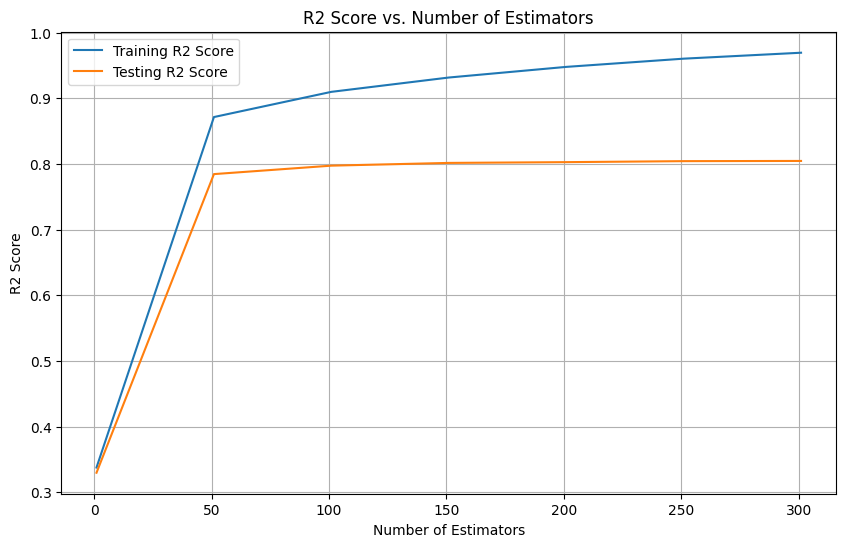

In [44]:
n_r2score_plot(range(1,302,50),0,X_train_rf_selected,X_test_rf_selected,y_train,y_test)

In [45]:
# 设置要搜索的参数网格
param_grid = {
    'n_estimators': [100,200,250],
    'min_child_weight':range(2,5),
    'reg_alpha': [0.001, 0.01, 0.1, 1],
    'reg_lambda': [0.001, 0.01, 0.1, 1]
}
best_rf_XGB = grid_tune(param_grid, 0, 2, X_train_rf_selected, y_train)
scores(X_train_rf_selected,X_test_rf_selected,y_train,y_test,best_rf_XGB)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/Users/simaochen/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/simaochen/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/simaochen/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/simaochen/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/simaochen/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWar

Best parameters found:  {'min_child_weight': 2, 'n_estimators': 250, 'reg_alpha': 1, 'reg_lambda': 0.01}
Best R2 Score:  0.8030027193324024
Train R2 score: 0.9591806412457266, Test R2 score 0.8019581371480191
Train MSE: 0.025390266913798493, Test MSE: 0.12814081907436578
Train RMSE: 0.1593432361721027, Test RMSE: 0.35796762294146905
Train MAPE: 0.02395552020764349, Test MAPE: 0.05183492611032383


### baseline model-RF

In [46]:
# baseline model
rf_rf_features = RandomForestRegressor(random_state=42)
rf_rf_features.fit(X_train_rf_selected, y_train)

scores(X_train_rf_selected,X_test_rf_selected,y_train,y_test,rf_rf_features)

Train R2 score: 0.9695392820494647, Test R2 score 0.7888881357862115
Train MSE: 0.018947033533912493, Test MSE: 0.13659762035711714
Train RMSE: 0.13764822386762748, Test RMSE: 0.3695911529746311
Train MAPE: 0.018947104027511603, Test MAPE: 0.05282277973237559


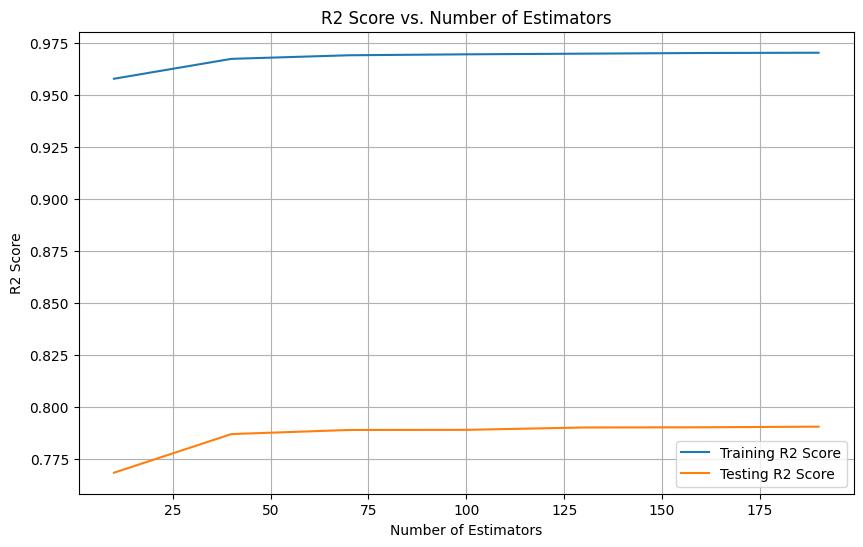

In [47]:
n_r2score_plot(range(10,201,30),1,X_train_rf_selected,X_test_rf_selected,y_train,y_test)

In [ ]:
# 设置要搜索的参数网格
param_grid = {
    'n_estimators': [110,180,250],
#     'max_depth': [10, 20]
    'min_samples_split': [2, 5, 10]
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
}
best_rf_rf = grid_tune(param_grid, 1, 2, X_train_rf_selected, y_train)
scores(X_train_rf_selected,X_test_rf_selected,y_train,y_test,best_rf_rf)

## feature selection-XGBoost

In [48]:
# 使用内置的特征重要性
selection = SelectFromModel(xg_reg, prefit=True, threshold='median')  # threshold可以是具体的数值或者字符串，如'median'
X_train_XGB_selected = selection.transform(X_train)
X_test_XGB_selected = selection.transform(X_test)


# 查看被选中的特征数量
selected_features_count = X_train_XGB_selected.shape[1]
# 获取被选中的特征名
selected_features = X_train.columns[(selection.get_support())]

# 打印被选中的特征名
print("Selected features:", selected_features)

Selected features: Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       ...
       'property_type_Private room in loft',
       'property_type_Private room in rental unit',
       'property_type_Private room in townhouse',
       'property_type_Room in boutique hotel', 'property_type_Room in hotel',
       'property_type_Shared room in home',
       'property_type_Shared room in rental unit', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object', length=157)


### baseline model-XGBoost

In [49]:
# 初始化XGBoost回归模型
xg_reg_xg_features = xgb.XGBRegressor(random_state=42)
xg_reg_xg_features.fit(X_train_XGB_selected, y_train)
scores(X_train_XGB_selected,X_test_XGB_selected,y_train,y_test,xg_reg_xg_features)

Train R2 score: 0.90272174093999, Test R2 score 0.794832048584202
Train MSE: 0.060508568429794574, Test MSE: 0.13275167665878718
Train RMSE: 0.2459848947187501, Test RMSE: 0.3643510349357981
Train MAPE: 0.03725715060593171, Test MAPE: 0.053569651123369574


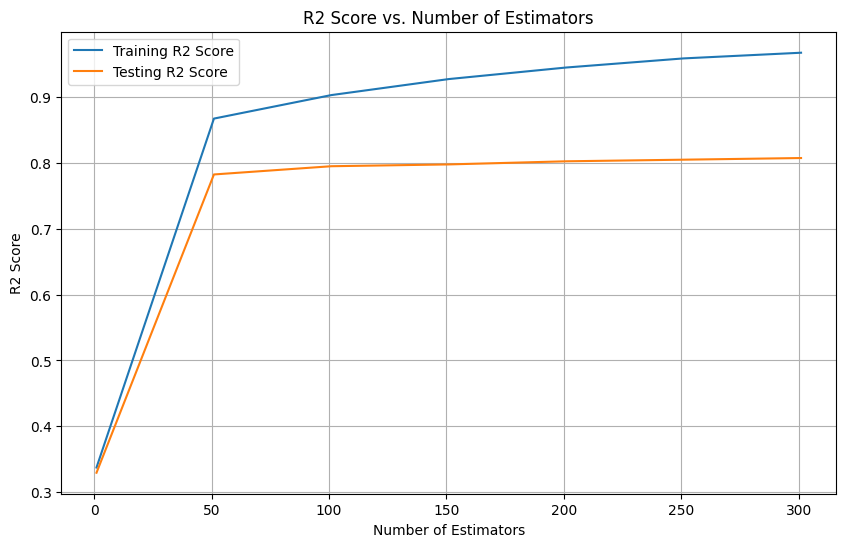

In [50]:
n_r2score_plot(range(1,302,50),0,X_train_XGB_selected,X_test_XGB_selected,y_train,y_test)

In [51]:
# 设置要搜索的参数网格
param_grid = {
    'n_estimators': [100,200,250],
    'min_child_weight':range(2,5),
    'reg_alpha': [0.001, 0.01, 0.1, 1],
    'reg_lambda': [0.001, 0.01, 0.1, 1]
}
best_xgb_XGB = grid_tune(param_grid, 0, 2, X_train_XGB_selected,y_train)
scores(X_train_XGB_selected, X_test_XGB_selected,y_train,y_test,best_xgb_XGB)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found:  {'min_child_weight': 3, 'n_estimators': 250, 'reg_alpha': 1, 'reg_lambda': 0.1}
Best R2 Score:  0.8037469628358936
Train R2 score: 0.956753991590732, Test R2 score 0.805432659839352
Train MSE: 0.026899680200212217, Test MSE: 0.1258926672081483
Train RMSE: 0.16401121973881, Test RMSE: 0.354813566832144
Train MAPE: 0.024816522201537756, Test MAPE: 0.05130085062511313


### baseline model-RF

In [52]:
# baseline model
rf_rf_features = RandomForestRegressor(random_state=42)
rf_rf_features.fit(X_train_XGB_selected, y_train)

scores(X_train_XGB_selected,X_test_XGB_selected,y_train,y_test,rf_rf_features)

Train R2 score: 0.9694684601553315, Test R2 score 0.7886800211965647
Train MSE: 0.018991085837776686, Test MSE: 0.13673227862378173
Train RMSE: 0.1378081486624673, Test RMSE: 0.3697732800295091
Train MAPE: 0.018996177474035644, Test MAPE: 0.05291806687047632


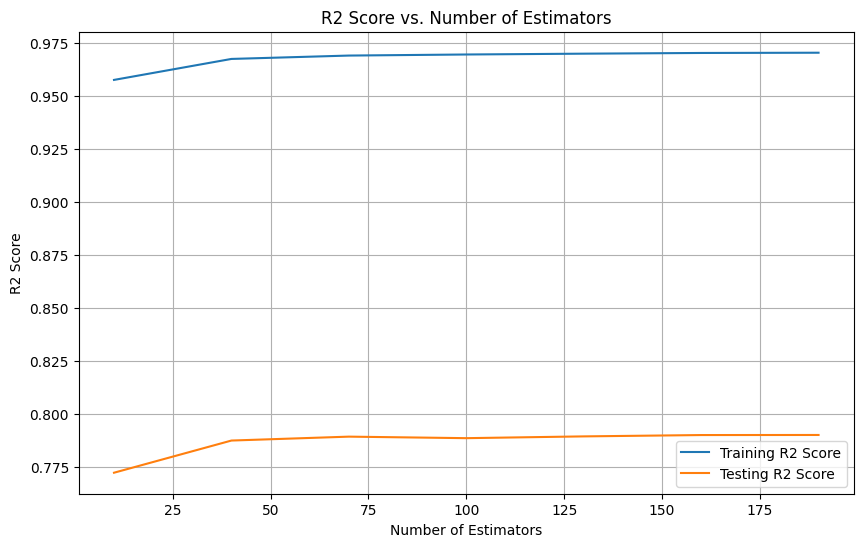

[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=0.001; total time=   1.3s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=0.1; total time=   1.2s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=1; total time=   1.4s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01; total time=   1.3s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=1; total time=   1.4s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=0.001; total time=   1.6s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1; total time=   1.6s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.6s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=0.01; total time=   1.9s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=0.1; total time=   1.6s
[CV] END min_child_weight=

[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=0.01; total time=   1.4s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=0.1; total time=   1.2s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=0.001; total time=   1.4s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1; total time=   1.3s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=1; total time=   1.4s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=0.001; total time=   1.6s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.5s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=0.001; total time=   1.6s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=0.1; total time=   1.9s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END min_child_weight=2,

[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=0.01; total time=   1.3s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=0.01; total time=   1.2s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=1; total time=   1.4s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01; total time=   1.3s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1; total time=   1.4s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=0.001; total time=   1.5s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1; total time=   1.6s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.6s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=0.01; total time=   1.9s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END min_child_weight=

[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=0.001; total time=   1.3s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=0.1; total time=   1.2s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=1; total time=   1.4s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01; total time=   1.3s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1; total time=   1.3s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=0.001; total time=   1.6s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=0.01; total time=   1.6s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.6s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=0.01; total time=   1.8s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=0.1; total time=   1.7s
[CV] END min_child_weig

[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=0.001; total time=   1.4s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=1; total time=   1.2s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=0.001; total time=   1.4s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01; total time=   1.3s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=1; total time=   1.4s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=0.01; total time=   1.5s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1; total time=   1.5s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=0.001; total time=   1.6s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=0.01; total time=   1.9s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.6s
[CV] END min_child_weight=

[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=0.001; total time=   1.3s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=0.01; total time=   1.2s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=1; total time=   1.4s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=0.001; total time=   1.3s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1; total time=   1.3s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=0.001; total time=   1.5s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=0.01; total time=   1.5s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   1.5s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=0.001; total time=   1.9s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=0.1; total time=   1.7s
[CV] END min_child_w

[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=0.001; total time=   1.4s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=0.1; total time=   1.2s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=0.001; total time=   1.4s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01; total time=   1.3s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=1; total time=   1.5s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=0.01; total time=   1.5s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1; total time=   1.5s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=0.001; total time=   1.6s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=0.01; total time=   1.9s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END min_child_weigh

[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=0.01; total time=   1.4s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.001, reg_lambda=0.1; total time=   1.2s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=0.001; total time=   1.4s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1; total time=   1.3s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.01, reg_lambda=1; total time=   1.5s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=0.01; total time=   1.5s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1; total time=   1.5s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=0.001; total time=   1.6s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=0.1; total time=   1.9s
[CV] END min_child_weight=2, n_estimators=100, reg_alpha=1, reg_lambda=1; total time=   1.7s
[CV] END min_child_weight=2

In [53]:
n_r2score_plot(range(10,201,30),1,X_train_XGB_selected,X_test_XGB_selected,y_train,y_test)

In [54]:
# 设置要搜索的参数网格
param_grid = {
    'n_estimators': [110,150,200,300],
#     'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
}
best_rf_rf = grid_tune(param_grid, 1, 2, X_train_XGB_selected,y_train)
scores(X_train_XGB_selected,X_test_XGB_selected,y_train,y_test,best_rf_rf)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/simaochen/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/simaochen/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/simaochen/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/simaochen/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/simaochen/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWar

/Users/simaochen/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/simaochen/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/simaochen/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/simaochen/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

/Users/simaochen/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/simaochen/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/simaochen/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/simaochen/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

KeyboardInterrupt: 

## feature selection-PCA

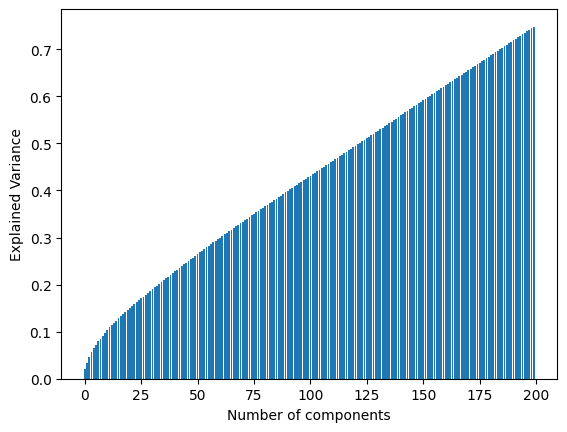

In [55]:
#plot explained variance over the number of compinents
# try to find a best component num
pca = PCA(X.shape[1])
X_S=pca.fit_transform(X)
eigenvalues = pca.explained_variance_ratio_
n= 200
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [56]:
bestPCA = PCA(106)
X_PCA_S_after=bestPCA.fit_transform(X)
X_PCA_S_after.shape

(18042, 106)

In [57]:
components = pd.DataFrame(bestPCA.components_,columns=X.columns)
top_features = components.abs().idxmax(axis=1)

In [58]:
print(top_features)

0                         cheap_room_type
1                       reviews_per_month
2             property_type_Room in hotel
3                                bedrooms
4                   room_type_Shared room
                      ...                
101    neighbourhood_cleansed_Kew Gardens
102         neighbourhood_cleansed_Hollis
103    neighbourhood_cleansed_Columbia St
104        neighbourhood_cleansed_Melrose
105       neighbourhood_cleansed_Van Nest
Length: 106, dtype: object


In [59]:
X_train_PCA_selected, X_test_PCA_selected, y_train, y_test = train_test_split(X_PCA_S_after, y, test_size=0.2, random_state=99)

### baseline model-XGBoost

In [60]:
# 初始化XGBoost回归模型
xg_reg_pca_features = xgb.XGBRegressor(random_state=42)
xg_reg_pca_features.fit(X_train_PCA_selected, y_train)
scores(X_train_PCA_selected,X_test_PCA_selected,y_train,y_test,xg_reg_pca_features)

Train R2 score: 0.9548107240064018, Test R2 score 0.7530286584735747
Train MSE: 0.02810842242833236, Test MSE: 0.15980010254066604
Train RMSE: 0.16765566625775688, Test RMSE: 0.39975005008213077
Train MAPE: 0.025623582948516205, Test MAPE: 0.05856772918269629


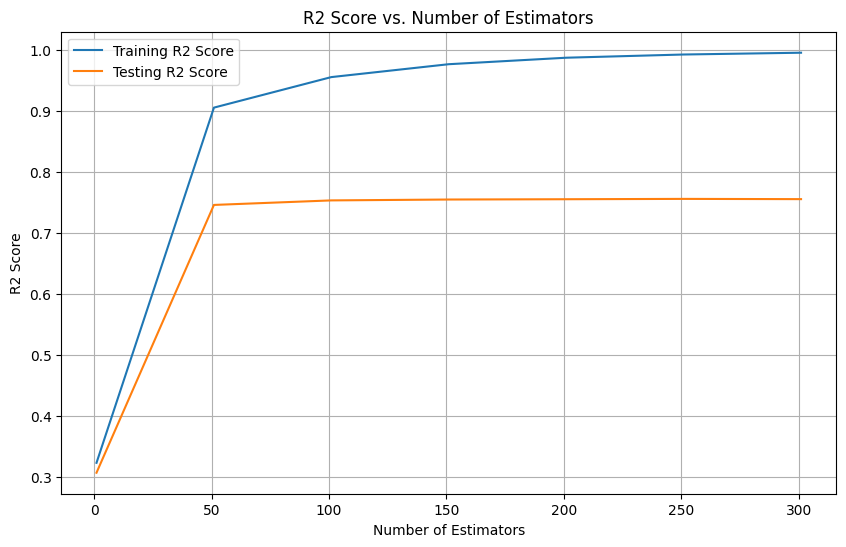

In [61]:
n_r2score_plot(range(1,302,50),0,X_train_PCA_selected,X_test_PCA_selected,y_train,y_test)

In [ ]:
# 设置要搜索的参数网格
param_grid = {
    'n_estimators': [50,100,200,300],
#     'min_child_weight':range(2,6),
    'reg_alpha': [0.001, 0.01, 0.1, 1],
    'reg_lambda': [0.001, 0.01, 0.1, 1]
}
best_pca_XGB = grid_tune(param_grid, 0, 2, X_train_PCA_selected,y_train)
scores(X_train_PCA_selected,X_test_PCA_selected,y_train,y_test,best_pca_XGB)

### baseline model-RF

In [62]:
# baseline model
pca_rf_features = RandomForestRegressor(random_state=42,n_jobs=-1)
pca_rf_features.fit(X_train_PCA_selected, y_train)

scores(X_train_PCA_selected,X_test_PCA_selected,y_train,y_test,pca_rf_features)

Train R2 score: 0.964996840969355, Test R2 score 0.7505985225325451
Train MSE: 0.02177250152223834, Test MSE: 0.16137249539468768
Train RMSE: 0.14755507962194436, Test RMSE: 0.40171195575273544
Train MAPE: 0.02111875455009836, Test MAPE: 0.05838202398158077


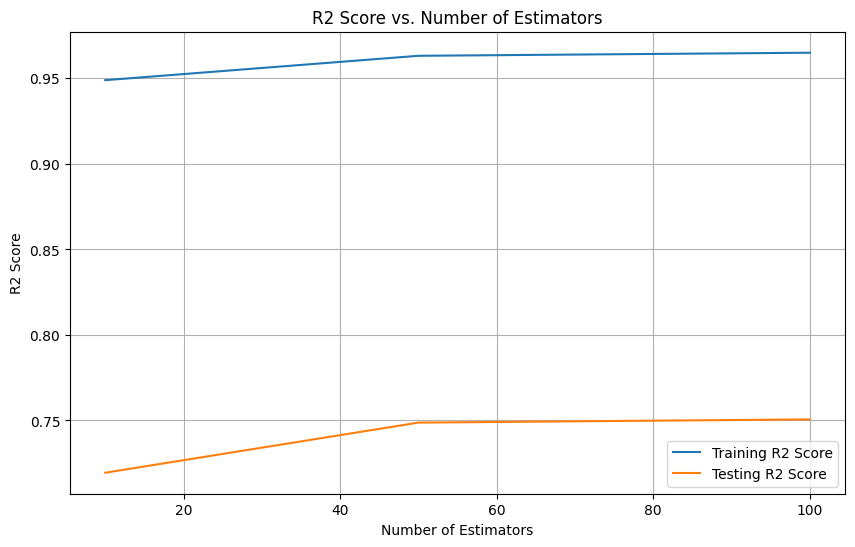

In [63]:
n_r2score_plot([10,50,100],1,X_train_PCA_selected,X_test_PCA_selected,y_train,y_test)

# Results

<tbody><tr height="29.50" style="height:14.75pt;">
    <td class="xl66" height="63" width="301" rowspan="2" style="height:31.50pt;width:150.50pt;border-right:.5pt solid #000000;border-bottom:1.5pt solid #000000;" x:str="">feature selection method</td>
    <td class="xl67" width="169" rowspan="2" style="width:84.50pt;border-right:.5pt solid windowtext;border-bottom:1.5pt solid windowtext;" x:str="">model</td>
    <td class="xl68" width="387.20" colspan="4" style="width:193.60pt;border-right:.5pt solid windowtext;border-bottom:.5pt solid windowtext;" x:str="">training data</td>
    <td class="xl69" width="387.20" colspan="4" style="width:193.60pt;border-right:none;border-bottom:.5pt solid windowtext;" x:str="">testing data</td>
   </tr>
   <tr height="33.50" style="height:16.75pt;">
    <td class="xl72" x:str="">R<font class="font20"><sup>2</sup></font></td>
    <td class="xl73" x:str="">MSE</td>
    <td class="xl73" x:str="">RMSE</td>
    <td class="xl74" x:str="">MAPE</td>
    <td class="xl74" x:str="">R<font class="font20"><sup>2</sup></font></td>
    <td class="xl73" x:str="">MSE</td>
    <td class="xl73" x:str="">RMSE</td>
    <td class="xl84" x:str="">MAPE</td>
   </tr>
   <tr height="29.50" style="height:14.75pt;">
    <td class="xl75" height="57.50" rowspan="2" style="height:28.75pt;border-right:.5pt solid #000000;border-bottom:.5pt solid #000000;" x:str="">None</td>
    <td class="xl76" x:str="">Random Forest</td>
    <td class="xl77" x:num="0.969477097554718">0.9695<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="1.8985713242944999e-002">0.0190<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.137788654260592">0.1378<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="1.89932184698209e-002">0.0190<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.78839709528516499">0.7884<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.13691534273710501">0.1369<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.37002073284764098">0.3700<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="5.2893995960203798e-002">0.0529<span style="mso-spacerun:yes;">&nbsp;</span></td>
   </tr>
   <tr height="28" style="height:14.00pt;">
    <td class="xl79" x:str="">XGBoost</td>
    <td class="xl77" x:num="0.90186601740525396">0.9019<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="6.1040841586807101e-002">0.0610<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.24706444824540599">0.2471<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="3.7078397819275598e-002">0.0371<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.79528541562614496">0.7953<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.13245833047803801">0.1325<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.36394825247284601">0.3639<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="5.3604520571596197e-002">0.0536<span style="mso-spacerun:yes;">&nbsp;</span></td>
   </tr>
   <tr height="28" style="height:14.00pt;">
    <td class="xl78" height="56" rowspan="2" style="height:28.00pt;border-right:.5pt solid #000000;border-bottom:.5pt solid #000000;" x:str="">Random Forest</td>
    <td class="xl79" x:str="">Random Forest</td>
    <td class="xl77" x:num="0.97045432094684303">0.9705<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="1.8377865312020202e-002">0.0184<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.13556498556788199">0.1356<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="1.8791229486821999e-002">0.0188<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.79006720547704701">0.7901<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.13583471622284099">0.1358<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.36855761587958102">0.3686<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="5.2779839311995098e-002">0.0528<span style="mso-spacerun:yes;">&nbsp;</span></td>
   </tr>
   <tr height="28" style="height:14.00pt;">
    <td class="xl79" x:str="">XGBoost</td>
    <td class="xl77" x:num="0.95916670922940095">0.9592<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="2.5398932841533401e-002">0.0254<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.15937042649605099">0.1594<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="2.3994947118946099e-002">0.0240<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.806823317883545">0.8068<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.12499285714643101">0.1250<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.35354328892857201">0.3535<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="5.1874613365576798e-002">0.0519<span style="mso-spacerun:yes;">&nbsp;</span></td>
   </tr>
   <tr height="28" style="height:14.00pt;">
    <td class="xl78" height="56" rowspan="2" style="height:28.00pt;border-right:.5pt solid #000000;border-bottom:.5pt solid #000000;" x:str="">XGBoost</td>
    <td class="xl79" x:str="">Random Forest</td>
    <td class="xl77" x:num="0.97046445956826999">0.9705<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="1.83715589340653e-002">0.0184<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.13554172396006001">0.1355<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="1.8805524967112599e-002">0.0188<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.78870758840334998">0.7887<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.136714441564453">0.1367<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.36974916032961203">0.3697<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="5.28093060807385e-002">0.0528<span style="mso-spacerun:yes;">&nbsp;</span></td>
   </tr>
   <tr height="28" style="height:14.00pt;">
    <td class="xl79" x:str="">XGBoost</td>
    <td class="xl77" x:num="0.94606001421715802">0.9461<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="3.3551498067310101e-002">0.0336<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.18317068015190099">0.1832<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="2.7619874505555201e-002">0.0276<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.80614071094311002">0.8061<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.12543453049363901">0.1254<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.35416737638246598">0.3542<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="5.1820144450738299e-002">0.0518<span style="mso-spacerun:yes;">&nbsp;</span></td>
   </tr>
   <tr height="28" style="height:14.00pt;">
    <td class="xl78" height="57.50" rowspan="2" style="height:28.75pt;border-right:.5pt solid #000000;border-bottom:1.0pt solid #000000;" x:str="">PCA</td>
    <td class="xl79" x:str="">Random Forest</td>
    <td class="xl77" x:num="0.96533238019793799">0.9653<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="2.1563790978178201e-002">0.0216<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.14684614730451101">0.1468<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="2.0874986769144e-002">0.0209<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.75569232904895101">0.7557<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.15807660365837001">0.1581<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="0.39758848531914298">0.3976<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl77" x:num="5.7770564501017203e-002">0.0578<span style="mso-spacerun:yes;">&nbsp;</span></td>
   </tr>
   <tr height="29.50" style="height:14.75pt;">
    <td class="xl81" x:str="">XGBoost</td>
    <td class="xl82" x:num="0.98064158860726702">0.9806<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl82" x:num="1.20412286544592e-002">0.0120<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl82" x:num="0.109732532343235">0.1097<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl82" x:num="1.6550728801952099e-002">0.0166<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl82" x:num="0.75284821189042705">0.7528<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl82" x:num="0.159916858526651">0.1599<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl82" x:num="0.39989605965381902">0.3999<span style="mso-spacerun:yes;">&nbsp;</span></td>
    <td class="xl82" x:num="5.8608146146855403e-002">0.0586<span style="mso-spacerun:yes;">&nbsp;</span></td>
   </tr>
   <!--[if supportMisalignedColumns]-->
    <tr width="0" style="display:none;">
     <td width="301" style="width:151;"></td>
     <td width="169" style="width:85;"></td>
     <td width="97" style="width:48;"></td>
    </tr>
   <!--[endif]-->
  </tbody>

## Neural Nets
### Part 1: data processing following the previous data cleaning and analysis

In [146]:
X_train, X_val, y_train, y_val  = train_test_split(X_PCA_S_after, y, test_size=0.2, random_state=99)

In [147]:
type(X_train)

numpy.ndarray

In [148]:
# another way to fill nan
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))
X_val= np.nan_to_num(X_val, nan=np.nanmean(X_val))
# X_test_filled = np.nan_to_num(X_test, nan=np.nanmean(X_test))

y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train))
y_val = np.nan_to_num(y_val, nan=np.nanmean(y_val))
# y_test_filled = np.nan_to_num(y_test, nan=np.nanmean(y_test))



In [149]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
# y_test_tensor = torch.tensor(y_test_filled, dtype=torch.float32).view(-1, 1)


train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
# test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64

# data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [150]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [151]:
type(val_dataset)

torch.utils.data.dataset.TensorDataset

In [152]:
print("X_train_tensor shape:", X_train_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)


X_train_tensor shape: torch.Size([14433, 106])
y_train_tensor shape: torch.Size([14433, 1])


In [153]:
print("X_train_tensor shape:", X_val_tensor.shape)
print("y_train_tensor shape:", y_val_tensor.shape)

X_train_tensor shape: torch.Size([3609, 106])
y_train_tensor shape: torch.Size([3609, 1])


### Part 2: Experiment designs and implementations

### We use 4 models: 
### 1. Basic 5 layers
### 2. Basic 5 layers with Dropout
### 3. Basic 5 layers with Batch Normalization
### 4. Advanced with 9 layers

### We first use 4 different combinations of learning rate scedulers and optimizers on Basic 5 Layer. Then we use the best combinatio of hyperparameters on the rest 3 different architetures. In conlusion, we have 7 different comparable experiments in the following with train and validation losses, and train and validation accuracies metrics and graphs. We conclude that the 5 basic layer architecture with the first set of hyperparameters is the best model in our experiments with our chosen data to predict airbnb pricing for the next month: 

In [154]:
class AirbnbPricePredictor(nn.Module):
    def __init__(self, input_size):
        super(AirbnbPricePredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)  
        self.fc2 = nn.Linear(256, 128)       
        self.fc3 = nn.Linear(128, 64)          
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [177]:
class AirbnbPricePredictorDO(nn.Module):
    def __init__(self, input_size, dropout_prob=0.5):
        super(AirbnbPricePredictorDO, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.dropout1 = nn.Dropout(dropout_prob) 
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(dropout_prob) 
        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(dropout_prob)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x) 
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)  
        x = F.relu(self.fc3(x))
        x = self.dropout3(x) 
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x


In [178]:
class AirbnbPricePredictorBN(nn.Module):
    def __init__(self, input_size):
        super(AirbnbPricePredictorBN, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.relu(self.bn2(self.fc2(x)))
        x = F.relu(self.bn3(self.fc3(x)))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [190]:
class AirbnbPricePredictor9Layer(nn.Module):
    def __init__(self, input_size):
        super(AirbnbPricePredictor9Layer, self).__init__()
        self.fc1 = nn.Linear(input_size, 256) 
        self.fc2 = nn.Linear(256, 512)    
        self.fc3 = nn.Linear(512, 1024)        
        self.fc4 = nn.Linear(1024, 512)       
        self.fc5 = nn.Linear(512, 256)       
        self.fc6 = nn.Linear(256, 128)         
        self.fc7 = nn.Linear(128, 64)
        self.fc8 = nn.Linear(64, 32)
        self.fc9 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = self.fc9(x)
        return x

# NN Experiment 1 :

## Experiment 1-4 are different sets of hyperparameters with this same basci architecture.

## This set of the hyperparameters from experiment is the (slight)winner for this basic 5-layer architecture, and we will use this set to test on different architectures later (From Experiment 5, we start to experiment with different architectures)

## Hyperparameters: 
- **input_size**: Dimensionality of the input features in the training data. (106)
- **model**: Instance of the `AirbnbPricePredictor` model with input size `input_size`.
- **criterion**: Loss function used for optimization, specifically L1 Loss (Mean Absolute Error) with reduction method set to mean.
- **optimizer**: Adam optimizer used for model parameter optimization with a learning rate of 0.0002.
- **scheduler**: Learning rate scheduler using StepLR method, with a step size of 50 epochs and a gamma value of 0.1.
- **epochs**: Total number of training epochs set to 100.
- **threshold**: Convergence threshold set to 0.1, indicating a 10% change in loss between epochs for early stopping or other convergence criteria.

### Results: 

- **Hit almost 82% val acc around epoch 50, where train acc hits 93% around epoch 100**

In [206]:
input_size = X_train_tensor.shape[1]
model = AirbnbPricePredictor(input_size)
criterion = nn.L1Loss(reduction='mean')  # Using L1Loss for Mean Absolute Error
optimizer = optim.Adam(model.parameters(), lr=0.0002)
scheduler = StepLR(optimizer, step_size=50, gamma=0.1)

epochs = 100
threshold = 0.1  # 10% threshold

In [207]:
# Initialize lists to collect metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    train_correct_predictions = 0  # Separate variables for training accuracy calculation
    train_total_predictions = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # Check for NaN values in inputs
        if np.isnan(inputs).any():
            print("NaN values detected in inputs!")
            # Handle NaN values appropriately
            
        # Check for NaN values in labels
        if np.isnan(labels).any():
            print("NaN values detected in labels!")
            # Handle NaN values appropriately
            
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        
        # Calculate absolute percentage error for accuracy-like metric
        abs_percentage_error = torch.abs(outputs - labels) / labels
        
        # Count correct predictions within the threshold
        train_correct_predictions += torch.sum(abs_percentage_error <= threshold)
        train_total_predictions += len(labels)
        
    epoch_loss = running_loss / len(train_loader.dataset)
    training_accuracy = train_correct_predictions / train_total_predictions  # Using separate variables
    
    # Append training loss and accuracy to lists
    train_losses.append(epoch_loss)
    train_accuracies.append(training_accuracy)
    
    model.eval()
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            
            # Calculate absolute percentage error for accuracy-like metric
            abs_percentage_error = torch.abs(outputs - labels) / labels
            
            # Count correct predictions within the threshold
            correct_predictions += torch.sum(abs_percentage_error <= threshold)
            total_predictions += len(labels)
    
    epoch_val_loss = val_loss / len(val_loader.dataset)
    validation_accuracy = correct_predictions / total_predictions
    
    # Append validation loss and accuracy to lists
    val_losses.append(epoch_val_loss)
    val_accuracies.append(validation_accuracy)
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Training Accuracy: {training_accuracy:.2%}, Validation Accuracy: {validation_accuracy:.2%}')


Epoch 1/100, Loss: 2.1164, Val Loss: 0.8167, Training Accuracy: 25.67%, Validation Accuracy: 51.62%
Epoch 2/100, Loss: 0.6518, Val Loss: 0.5008, Training Accuracy: 58.89%, Validation Accuracy: 65.23%
Epoch 3/100, Loss: 0.4472, Val Loss: 0.4098, Training Accuracy: 68.45%, Validation Accuracy: 71.04%
Epoch 4/100, Loss: 0.3775, Val Loss: 0.3777, Training Accuracy: 73.34%, Validation Accuracy: 72.82%
Epoch 5/100, Loss: 0.3527, Val Loss: 0.3620, Training Accuracy: 75.25%, Validation Accuracy: 75.06%
Epoch 6/100, Loss: 0.3326, Val Loss: 0.3671, Training Accuracy: 77.52%, Validation Accuracy: 72.87%
Epoch 7/100, Loss: 0.3193, Val Loss: 0.3413, Training Accuracy: 78.76%, Validation Accuracy: 76.59%
Epoch 8/100, Loss: 0.3137, Val Loss: 0.3427, Training Accuracy: 79.47%, Validation Accuracy: 77.17%
Epoch 9/100, Loss: 0.3033, Val Loss: 0.3420, Training Accuracy: 80.62%, Validation Accuracy: 75.31%
Epoch 10/100, Loss: 0.2959, Val Loss: 0.3274, Training Accuracy: 81.56%, Validation Accuracy: 77.78%

Epoch 83/100, Loss: 0.1843, Val Loss: 0.2984, Training Accuracy: 92.46%, Validation Accuracy: 81.30%
Epoch 84/100, Loss: 0.1851, Val Loss: 0.2989, Training Accuracy: 92.51%, Validation Accuracy: 81.24%
Epoch 85/100, Loss: 0.1837, Val Loss: 0.2958, Training Accuracy: 92.79%, Validation Accuracy: 81.68%
Epoch 86/100, Loss: 0.1840, Val Loss: 0.2994, Training Accuracy: 92.75%, Validation Accuracy: 80.96%
Epoch 87/100, Loss: 0.1820, Val Loss: 0.2999, Training Accuracy: 92.72%, Validation Accuracy: 81.13%
Epoch 88/100, Loss: 0.1828, Val Loss: 0.2972, Training Accuracy: 92.63%, Validation Accuracy: 80.60%
Epoch 89/100, Loss: 0.1818, Val Loss: 0.3286, Training Accuracy: 92.93%, Validation Accuracy: 78.75%
Epoch 90/100, Loss: 0.1812, Val Loss: 0.3107, Training Accuracy: 93.03%, Validation Accuracy: 80.27%
Epoch 91/100, Loss: 0.1802, Val Loss: 0.2983, Training Accuracy: 93.04%, Validation Accuracy: 81.96%
Epoch 92/100, Loss: 0.1800, Val Loss: 0.2991, Training Accuracy: 93.11%, Validation Accurac

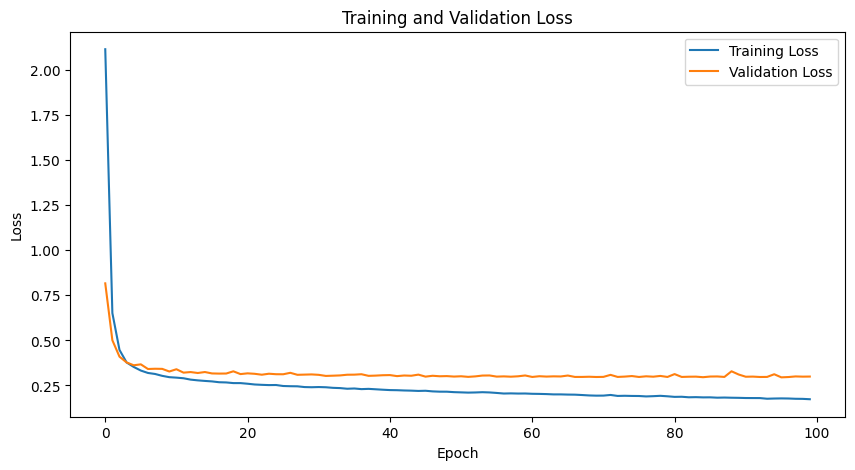

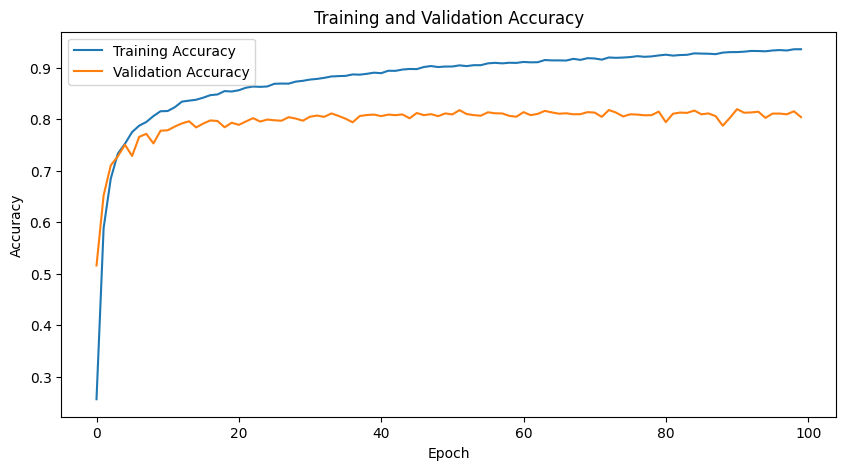

In [208]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# NN Experiment 2: 

## Hyperparameters: 
- **input_size**: Dimensionality of the input features in the training data. (106)
- **model**: Instance of the `AirbnbPricePredictor` model with input size `input_size`.
- **criterion**: Loss function used for optimization, specifically nn.MSELoss() with reduction method set to mean.
- **optimizer**: Adam optimizer used for model parameter optimization with a learning rate of 0.0002.
- **scheduler**: No specifict learning rate scheduler set, with the constant 0.0002 lr. 
- **epochs**: Total number of training epochs set to 100.
- **threshold**: Convergence threshold set to 0.1, indicating a 10% change in loss between epochs for early stopping or other convergence criteria.

### Results: 
- **Hit almost 82% val acc around epoch 50, where train acc hits 93% around epoch 100** (Best so far)
- **Hit 80% val acc around epoch 25, where train acc hits 95% around epoch 100, indicating some overfitting** (Currently)

In [209]:
input_size = X_train_tensor.shape[1]
print(input_size)
model = AirbnbPricePredictor(input_size)

criterion = nn.MSELoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), lr=0.0002)
threshold = 0.1

106


In [210]:
# Initialize lists to collect metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    train_correct_predictions = 0  # Separate variables for training accuracy calculation
    train_total_predictions = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # Check for NaN values in inputs
        if np.isnan(inputs).any():
            print("NaN values detected in inputs!")
            # Handle NaN values appropriately
            
        # Check for NaN values in labels
        if np.isnan(labels).any():
            print("NaN values detected in labels!")
            # Handle NaN values appropriately
            
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        
        # Calculate absolute percentage error for accuracy-like metric
        abs_percentage_error = torch.abs(outputs - labels) / labels
        
        # Count correct predictions within the threshold
        train_correct_predictions += torch.sum(abs_percentage_error <= threshold)
        train_total_predictions += len(labels)
        
    epoch_loss = running_loss / len(train_loader.dataset)
    training_accuracy = train_correct_predictions / train_total_predictions  # Using separate variables
    
    # Append training loss and accuracy to lists
    train_losses.append(epoch_loss)
    train_accuracies.append(training_accuracy)
    
    model.eval()
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            
            # Calculate absolute percentage error for accuracy-like metric
            abs_percentage_error = torch.abs(outputs - labels) / labels
            
            # Count correct predictions within the threshold
            correct_predictions += torch.sum(abs_percentage_error <= threshold)
            total_predictions += len(labels)
    
    epoch_val_loss = val_loss / len(val_loader.dataset)
    validation_accuracy = correct_predictions / total_predictions
    
    # Append validation loss and accuracy to lists
    val_losses.append(epoch_val_loss)
    val_accuracies.append(validation_accuracy)
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Training Accuracy: {training_accuracy:.2%}, Validation Accuracy: {validation_accuracy:.2%}')


Epoch 1/100, Loss: 10.5714, Val Loss: 3.1998, Training Accuracy: 7.39%, Validation Accuracy: 14.99%
Epoch 2/100, Loss: 2.4118, Val Loss: 1.4509, Training Accuracy: 31.41%, Validation Accuracy: 44.08%
Epoch 3/100, Loss: 0.9242, Val Loss: 0.6385, Training Accuracy: 50.39%, Validation Accuracy: 55.58%
Epoch 4/100, Loss: 0.4217, Val Loss: 0.3838, Training Accuracy: 61.75%, Validation Accuracy: 62.79%
Epoch 5/100, Loss: 0.2952, Val Loss: 0.3183, Training Accuracy: 67.68%, Validation Accuracy: 68.22%
Epoch 6/100, Loss: 0.2563, Val Loss: 0.2918, Training Accuracy: 70.58%, Validation Accuracy: 71.29%
Epoch 7/100, Loss: 0.2366, Val Loss: 0.2686, Training Accuracy: 72.76%, Validation Accuracy: 71.16%
Epoch 8/100, Loss: 0.2185, Val Loss: 0.2588, Training Accuracy: 74.78%, Validation Accuracy: 73.51%
Epoch 9/100, Loss: 0.2078, Val Loss: 0.2693, Training Accuracy: 75.81%, Validation Accuracy: 70.44%
Epoch 10/100, Loss: 0.1988, Val Loss: 0.2436, Training Accuracy: 76.84%, Validation Accuracy: 72.65%

Epoch 83/100, Loss: 0.0703, Val Loss: 0.2003, Training Accuracy: 93.92%, Validation Accuracy: 78.25%
Epoch 84/100, Loss: 0.0691, Val Loss: 0.1919, Training Accuracy: 94.28%, Validation Accuracy: 79.97%
Epoch 85/100, Loss: 0.0676, Val Loss: 0.2010, Training Accuracy: 94.32%, Validation Accuracy: 79.50%
Epoch 86/100, Loss: 0.0677, Val Loss: 0.2036, Training Accuracy: 94.24%, Validation Accuracy: 78.66%
Epoch 87/100, Loss: 0.0671, Val Loss: 0.1870, Training Accuracy: 94.51%, Validation Accuracy: 80.49%
Epoch 88/100, Loss: 0.0645, Val Loss: 0.1957, Training Accuracy: 94.55%, Validation Accuracy: 78.94%
Epoch 89/100, Loss: 0.0647, Val Loss: 0.1938, Training Accuracy: 94.73%, Validation Accuracy: 80.24%
Epoch 90/100, Loss: 0.0641, Val Loss: 0.2113, Training Accuracy: 94.78%, Validation Accuracy: 78.14%
Epoch 91/100, Loss: 0.0667, Val Loss: 0.1950, Training Accuracy: 94.43%, Validation Accuracy: 79.36%
Epoch 92/100, Loss: 0.0659, Val Loss: 0.1930, Training Accuracy: 94.55%, Validation Accurac

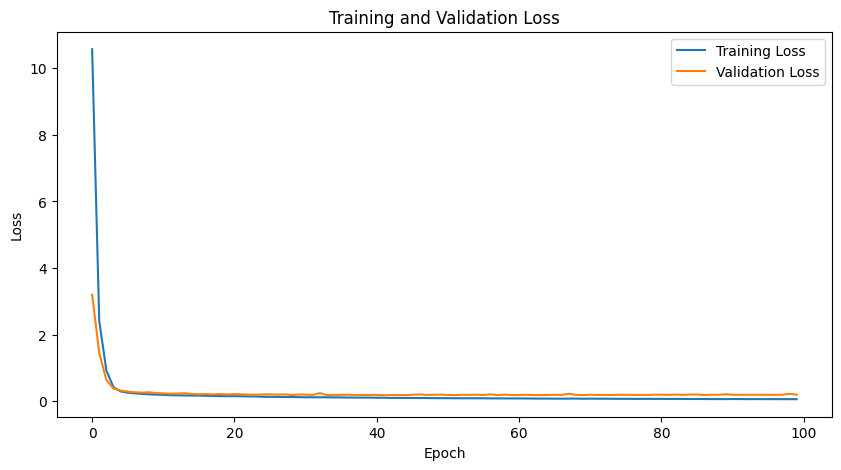

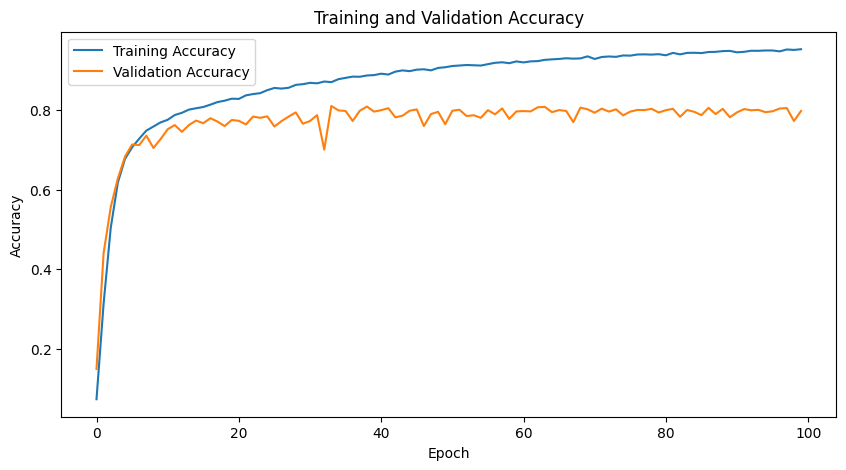

In [211]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# NN Experiment 3: 

## Hyperparameters: 
- **input_size**: Dimensionality of the input features in the training data. (106)
- **model**: Instance of the `AirbnbPricePredictor` model with input size `input_size`.
- **criterion**: Loss function used for optimization, specifically nn.L1Loss with reduction method set to mean.
- **optimizer**: Adam optimizer used for model parameter optimization with a learning rate of 0.0001.
- **scheduler**: No specifict learning rate scheduler set, with the constant 0.0001 lr. 
- **epochs**: Total number of training epochs set to 100.
- **threshold**: Convergence threshold set to 0.1, indicating a 10% change in loss between epochs for early stopping or other convergence criteria.

### Results: 
- **Hit almost 82% val acc around epoch 50, where train acc hits 93% around epoch 100** (Best so far)
- **Hit 80% val acc around epoch 57, where train acc hits 91% around epoch 100** (Currently)

In [214]:
input_size = X_train_tensor.shape[1]
print(input_size)
model = AirbnbPricePredictor(input_size)
criterion = nn.L1Loss(reduction='mean')
# criterion = nn.MSELoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), lr=0.0001)
threshold = 0.1

106


In [213]:
# Initialize lists to collect metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    train_correct_predictions = 0  # Separate variables for training accuracy calculation
    train_total_predictions = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # Check for NaN values in inputs
        if np.isnan(inputs).any():
            print("NaN values detected in inputs!")
            # Handle NaN values appropriately
            
        # Check for NaN values in labels
        if np.isnan(labels).any():
            print("NaN values detected in labels!")
            # Handle NaN values appropriately
            
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        
        # Calculate absolute percentage error for accuracy-like metric
        abs_percentage_error = torch.abs(outputs - labels) / labels
        
        # Count correct predictions within the threshold
        train_correct_predictions += torch.sum(abs_percentage_error <= threshold)
        train_total_predictions += len(labels)
        
    epoch_loss = running_loss / len(train_loader.dataset)
    training_accuracy = train_correct_predictions / train_total_predictions  # Using separate variables
    
    # Append training loss and accuracy to lists
    train_losses.append(epoch_loss)
    train_accuracies.append(training_accuracy)
    
    model.eval()
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            
            # Calculate absolute percentage error for accuracy-like metric
            abs_percentage_error = torch.abs(outputs - labels) / labels
            
            # Count correct predictions within the threshold
            correct_predictions += torch.sum(abs_percentage_error <= threshold)
            total_predictions += len(labels)
    
    epoch_val_loss = val_loss / len(val_loader.dataset)
    validation_accuracy = correct_predictions / total_predictions
    
    # Append validation loss and accuracy to lists
    val_losses.append(epoch_val_loss)
    val_accuracies.append(validation_accuracy)
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Training Accuracy: {training_accuracy:.2%}, Validation Accuracy: {validation_accuracy:.2%}')


Epoch 1/100, Loss: 2.9409, Val Loss: 1.2275, Training Accuracy: 9.97%, Validation Accuracy: 33.25%
Epoch 2/100, Loss: 0.9561, Val Loss: 0.8113, Training Accuracy: 46.10%, Validation Accuracy: 52.01%
Epoch 3/100, Loss: 0.7063, Val Loss: 0.6286, Training Accuracy: 57.10%, Validation Accuracy: 59.55%
Epoch 4/100, Loss: 0.5378, Val Loss: 0.4942, Training Accuracy: 65.20%, Validation Accuracy: 65.25%
Epoch 5/100, Loss: 0.4358, Val Loss: 0.4311, Training Accuracy: 70.50%, Validation Accuracy: 68.91%
Epoch 6/100, Loss: 0.3882, Val Loss: 0.3979, Training Accuracy: 73.10%, Validation Accuracy: 71.49%
Epoch 7/100, Loss: 0.3600, Val Loss: 0.3748, Training Accuracy: 75.44%, Validation Accuracy: 73.26%
Epoch 8/100, Loss: 0.3407, Val Loss: 0.3676, Training Accuracy: 77.32%, Validation Accuracy: 73.68%
Epoch 9/100, Loss: 0.3271, Val Loss: 0.3601, Training Accuracy: 78.31%, Validation Accuracy: 74.40%
Epoch 10/100, Loss: 0.3198, Val Loss: 0.3568, Training Accuracy: 78.95%, Validation Accuracy: 74.87%


Epoch 83/100, Loss: 0.2014, Val Loss: 0.3088, Training Accuracy: 90.55%, Validation Accuracy: 79.61%
Epoch 84/100, Loss: 0.2010, Val Loss: 0.3046, Training Accuracy: 90.56%, Validation Accuracy: 80.33%
Epoch 85/100, Loss: 0.2025, Val Loss: 0.3070, Training Accuracy: 90.65%, Validation Accuracy: 80.58%
Epoch 86/100, Loss: 0.1996, Val Loss: 0.3058, Training Accuracy: 90.63%, Validation Accuracy: 79.75%
Epoch 87/100, Loss: 0.1984, Val Loss: 0.3039, Training Accuracy: 90.69%, Validation Accuracy: 80.16%
Epoch 88/100, Loss: 0.1973, Val Loss: 0.3019, Training Accuracy: 90.78%, Validation Accuracy: 80.30%
Epoch 89/100, Loss: 0.1979, Val Loss: 0.3057, Training Accuracy: 90.79%, Validation Accuracy: 80.63%
Epoch 90/100, Loss: 0.1970, Val Loss: 0.3058, Training Accuracy: 90.75%, Validation Accuracy: 80.22%
Epoch 91/100, Loss: 0.1976, Val Loss: 0.3014, Training Accuracy: 90.78%, Validation Accuracy: 80.52%
Epoch 92/100, Loss: 0.1949, Val Loss: 0.3036, Training Accuracy: 91.11%, Validation Accurac

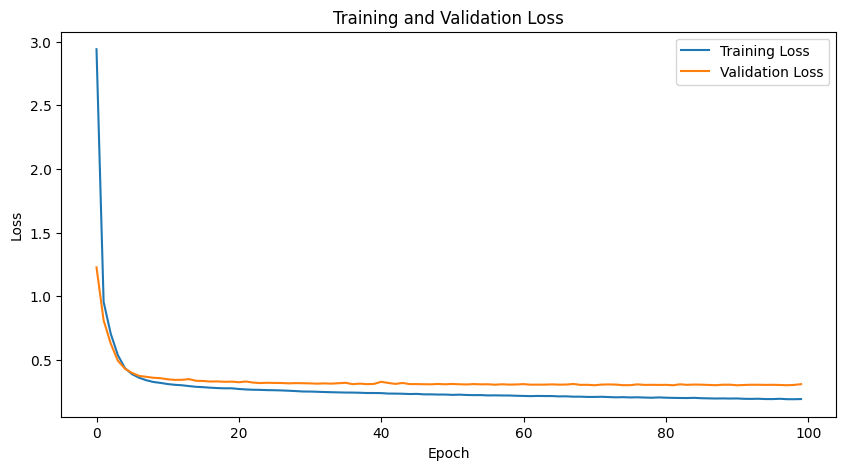

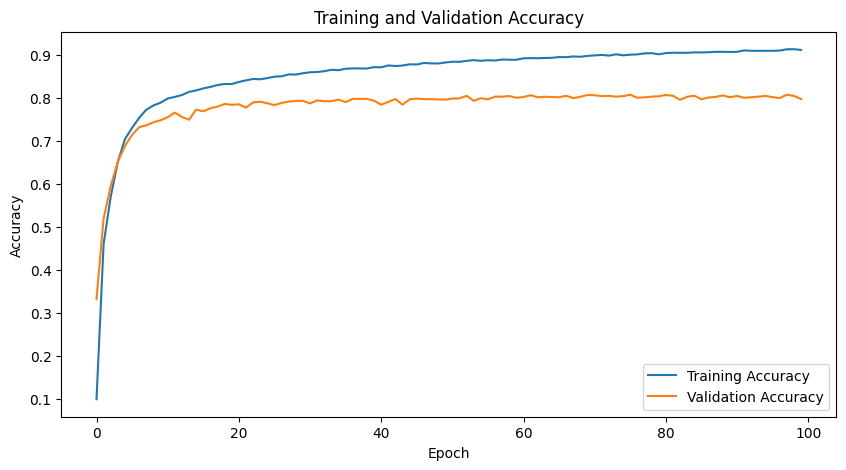

In [215]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# NN Experiment 4: 

## Hyperparameters: 
- **input_size**: Dimensionality of the input features in the training data. (106)
- **model**: Instance of the `AirbnbPricePredictor` model with input size `input_size`.
- **criterion**: Loss function used for optimization, specifically nn.L1Loss with reduction method set to mean.
- **optimizer**: SGD optimizer used for model parameter optimization with a learning rate of 0.01 and momentum of 0.9.
- **scheduler**: CyclicLR, with max of 0.01 and base_lr of 0.001. 
- **epochs**: Total number of training epochs set to 100.
- **threshold**: Convergence threshold set to 0.1, indicating a 10% change in loss between epochs for early stopping or other convergence criteria.

### Results: 
- **Hit almost 82% val acc around epoch 50, where train acc hits 93% around epoch 100** (Best so far)
- **Hit 82% val acc around epoch 90, where train acc hits 93% around epoch 100** (Currently)

In [156]:
input_size = X_train_tensor.shape[1]
print(input_size)
model = AirbnbPricePredictor(input_size)
criterion = nn.L1Loss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Define cyclic learning rate scheduler
step_size_up = 100  # Number of steps for the learning rate to increase
step_size_down = 200  # Number of steps for the learning rate to decrease
base_lr = 0.001  # Lower boundary for learning rate
max_lr = 0.01  # Upper boundary for learning rate
clr_scheduler = CyclicLR(optimizer, base_lr=base_lr, max_lr=max_lr,
                         step_size_up=step_size_up, step_size_down=step_size_down)

106


In [157]:
# Initialize lists to collect metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    train_correct_predictions = 0  # Separate variables for training accuracy calculation
    train_total_predictions = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # Check for NaN values in inputs
        if np.isnan(inputs).any():
            print("NaN values detected in inputs!")
            # Handle NaN values appropriately
            
        # Check for NaN values in labels
        if np.isnan(labels).any():
            print("NaN values detected in labels!")
            # Handle NaN values appropriately
            
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        
        # Calculate absolute percentage error for accuracy-like metric
        abs_percentage_error = torch.abs(outputs - labels) / labels
        
        # Count correct predictions within the threshold
        train_correct_predictions += torch.sum(abs_percentage_error <= threshold)
        train_total_predictions += len(labels)
        
    epoch_loss = running_loss / len(train_loader.dataset)
    training_accuracy = train_correct_predictions / train_total_predictions  # Using separate variables
    
    # Append training loss and accuracy to lists
    train_losses.append(epoch_loss)
    train_accuracies.append(training_accuracy)
    
    model.eval()
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            
            # Calculate absolute percentage error for accuracy-like metric
            abs_percentage_error = torch.abs(outputs - labels) / labels
            
            # Count correct predictions within the threshold
            correct_predictions += torch.sum(abs_percentage_error <= threshold)
            total_predictions += len(labels)
    
    epoch_val_loss = val_loss / len(val_loader.dataset)
    validation_accuracy = correct_predictions / total_predictions
    
    # Append validation loss and accuracy to lists
    val_losses.append(epoch_val_loss)
    val_accuracies.append(validation_accuracy)
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Training Accuracy: {training_accuracy:.2%}, Validation Accuracy: {validation_accuracy:.2%}')


Epoch 1/100, Loss: 2.3051, Val Loss: 0.5103, Training Accuracy: 23.08%, Validation Accuracy: 61.12%
Epoch 2/100, Loss: 0.4078, Val Loss: 0.3765, Training Accuracy: 68.77%, Validation Accuracy: 72.49%
Epoch 3/100, Loss: 0.3560, Val Loss: 0.3598, Training Accuracy: 74.34%, Validation Accuracy: 73.40%
Epoch 4/100, Loss: 0.3398, Val Loss: 0.3474, Training Accuracy: 76.01%, Validation Accuracy: 75.64%
Epoch 5/100, Loss: 0.3298, Val Loss: 0.3423, Training Accuracy: 77.43%, Validation Accuracy: 76.75%
Epoch 6/100, Loss: 0.3212, Val Loss: 0.3323, Training Accuracy: 78.58%, Validation Accuracy: 77.25%
Epoch 7/100, Loss: 0.3135, Val Loss: 0.3280, Training Accuracy: 79.19%, Validation Accuracy: 78.25%
Epoch 8/100, Loss: 0.3077, Val Loss: 0.3253, Training Accuracy: 79.99%, Validation Accuracy: 78.36%
Epoch 9/100, Loss: 0.3016, Val Loss: 0.3239, Training Accuracy: 80.49%, Validation Accuracy: 79.02%
Epoch 10/100, Loss: 0.2972, Val Loss: 0.3180, Training Accuracy: 80.81%, Validation Accuracy: 79.25%

Epoch 83/100, Loss: 0.1910, Val Loss: 0.2875, Training Accuracy: 91.87%, Validation Accuracy: 81.35%
Epoch 84/100, Loss: 0.1899, Val Loss: 0.2855, Training Accuracy: 91.90%, Validation Accuracy: 82.04%
Epoch 85/100, Loss: 0.1888, Val Loss: 0.2916, Training Accuracy: 91.85%, Validation Accuracy: 81.74%
Epoch 86/100, Loss: 0.1868, Val Loss: 0.2899, Training Accuracy: 92.19%, Validation Accuracy: 81.57%
Epoch 87/100, Loss: 0.1887, Val Loss: 0.2938, Training Accuracy: 91.92%, Validation Accuracy: 81.38%
Epoch 88/100, Loss: 0.1859, Val Loss: 0.2875, Training Accuracy: 92.12%, Validation Accuracy: 82.04%
Epoch 89/100, Loss: 0.1864, Val Loss: 0.2924, Training Accuracy: 92.32%, Validation Accuracy: 81.32%
Epoch 90/100, Loss: 0.1843, Val Loss: 0.2909, Training Accuracy: 92.30%, Validation Accuracy: 81.27%
Epoch 91/100, Loss: 0.1840, Val Loss: 0.2872, Training Accuracy: 92.19%, Validation Accuracy: 82.21%
Epoch 92/100, Loss: 0.1834, Val Loss: 0.2901, Training Accuracy: 92.55%, Validation Accurac

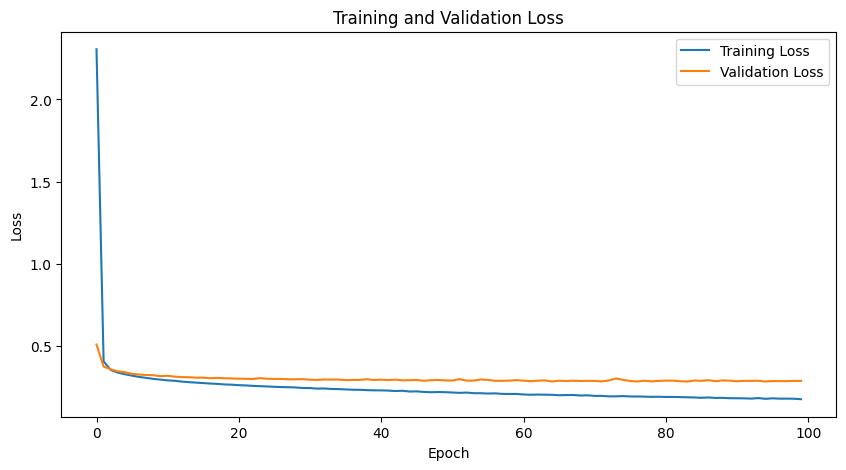

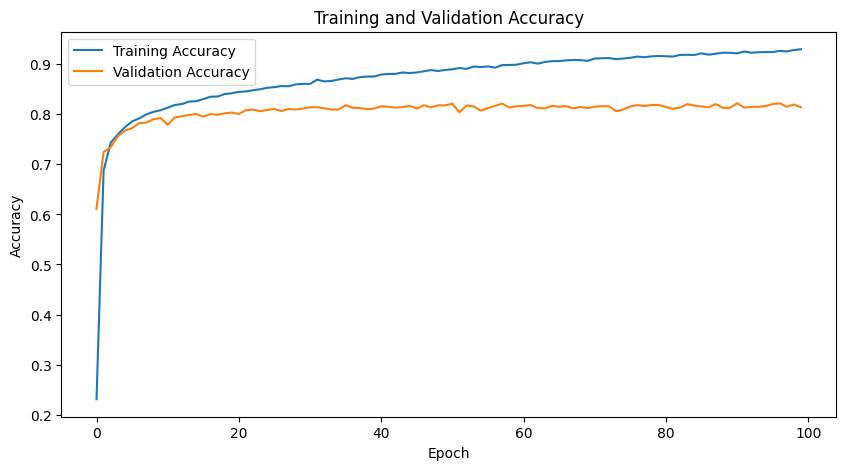

In [158]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# NN Experiment 5: （Different Architecture 5-layer with Dropout)
## Hyperparameters: 
- **input_size**: Dimensionality of the input features in the training data. (106)
- **model**: Instance of the `AirbnbPricePredictor` model with input size `input_size`.
- **criterion**: Loss function used for optimization, specifically L1 Loss (Mean Absolute Error) with reduction method set to mean.
- **optimizer**: Adam optimizer used for model parameter optimization with a learning rate of 0.0002.
- **scheduler**: Learning rate scheduler using StepLR method, with a step size of 50 epochs and a gamma value of 0.1.
- **epochs**: Total number of training epochs set to 200.
- **threshold**: Convergence threshold set to 0.1, indicating a 10% change in loss between epochs for early stopping or other convergence criteria.

### Results: 

- **Hit 82% val acc around epoch 50, where train acc hits 91% around epoch 54** （without Dropout)
- **Hit 81% val acc around epoch 55, where train acc hits 93% around epoch 100**  (Currently with Dropout)
### We can see a slightly worse val acc due to the regularization technique here. 



In [182]:
input_size = X_train_tensor.shape[1]
print(input_size)
model = AirbnbPricePredictor(input_size)
criterion = nn.L1Loss(reduction='mean')  # Using L1Loss for Mean Absolute Error
optimizer = optim.Adam(model.parameters(), lr=0.0002)
scheduler = StepLR(optimizer, step_size=50, gamma=0.1)

epochs = 200
threshold = 0.1  # 10% threshold

106


In [183]:
# Initialize lists to collect metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    train_correct_predictions = 0  # Separate variables for training accuracy calculation
    train_total_predictions = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # Check for NaN values in inputs
        if np.isnan(inputs).any():
            print("NaN values detected in inputs!")
            # Handle NaN values appropriately
            
        # Check for NaN values in labels
        if np.isnan(labels).any():
            print("NaN values detected in labels!")
            # Handle NaN values appropriately
            
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        
        # Calculate absolute percentage error for accuracy-like metric
        abs_percentage_error = torch.abs(outputs - labels) / labels
        
        # Count correct predictions within the threshold
        train_correct_predictions += torch.sum(abs_percentage_error <= threshold)
        train_total_predictions += len(labels)
        
    epoch_loss = running_loss / len(train_loader.dataset)
    training_accuracy = train_correct_predictions / train_total_predictions  # Using separate variables
    
    # Append training loss and accuracy to lists
    train_losses.append(epoch_loss)
    train_accuracies.append(training_accuracy)
    
    model.eval()
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            
            # Calculate absolute percentage error for accuracy-like metric
            abs_percentage_error = torch.abs(outputs - labels) / labels
            
            # Count correct predictions within the threshold
            correct_predictions += torch.sum(abs_percentage_error <= threshold)
            total_predictions += len(labels)
    
    epoch_val_loss = val_loss / len(val_loader.dataset)
    validation_accuracy = correct_predictions / total_predictions
    
    # Append validation loss and accuracy to lists
    val_losses.append(epoch_val_loss)
    val_accuracies.append(validation_accuracy)
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Training Accuracy: {training_accuracy:.2%}, Validation Accuracy: {validation_accuracy:.2%}')


Epoch 1/100, Loss: 2.1449, Val Loss: 0.8524, Training Accuracy: 26.19%, Validation Accuracy: 51.84%
Epoch 2/100, Loss: 0.6701, Val Loss: 0.5230, Training Accuracy: 59.44%, Validation Accuracy: 64.89%
Epoch 3/100, Loss: 0.4505, Val Loss: 0.4029, Training Accuracy: 69.57%, Validation Accuracy: 72.37%
Epoch 4/100, Loss: 0.3739, Val Loss: 0.3719, Training Accuracy: 74.13%, Validation Accuracy: 74.20%
Epoch 5/100, Loss: 0.3439, Val Loss: 0.3567, Training Accuracy: 76.90%, Validation Accuracy: 75.06%
Epoch 6/100, Loss: 0.3310, Val Loss: 0.3518, Training Accuracy: 77.87%, Validation Accuracy: 75.51%
Epoch 7/100, Loss: 0.3181, Val Loss: 0.3492, Training Accuracy: 79.03%, Validation Accuracy: 75.78%
Epoch 8/100, Loss: 0.3098, Val Loss: 0.3406, Training Accuracy: 80.22%, Validation Accuracy: 76.59%
Epoch 9/100, Loss: 0.3049, Val Loss: 0.3372, Training Accuracy: 80.59%, Validation Accuracy: 77.03%
Epoch 10/100, Loss: 0.2965, Val Loss: 0.3333, Training Accuracy: 81.69%, Validation Accuracy: 77.20%

Epoch 83/100, Loss: 0.1909, Val Loss: 0.2984, Training Accuracy: 92.30%, Validation Accuracy: 80.85%
Epoch 84/100, Loss: 0.1911, Val Loss: 0.3002, Training Accuracy: 92.40%, Validation Accuracy: 80.80%
Epoch 85/100, Loss: 0.1874, Val Loss: 0.2984, Training Accuracy: 92.33%, Validation Accuracy: 81.21%
Epoch 86/100, Loss: 0.1883, Val Loss: 0.2963, Training Accuracy: 92.20%, Validation Accuracy: 81.46%
Epoch 87/100, Loss: 0.1857, Val Loss: 0.2964, Training Accuracy: 92.43%, Validation Accuracy: 81.41%
Epoch 88/100, Loss: 0.1854, Val Loss: 0.2952, Training Accuracy: 92.56%, Validation Accuracy: 81.30%
Epoch 89/100, Loss: 0.1841, Val Loss: 0.2988, Training Accuracy: 92.54%, Validation Accuracy: 80.74%
Epoch 90/100, Loss: 0.1860, Val Loss: 0.2959, Training Accuracy: 92.53%, Validation Accuracy: 81.35%
Epoch 91/100, Loss: 0.1826, Val Loss: 0.2944, Training Accuracy: 92.88%, Validation Accuracy: 81.49%
Epoch 92/100, Loss: 0.1824, Val Loss: 0.3007, Training Accuracy: 93.01%, Validation Accurac

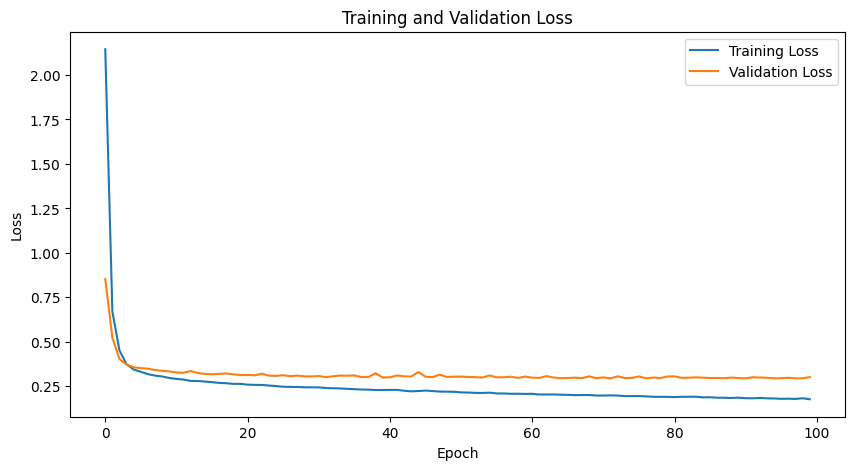

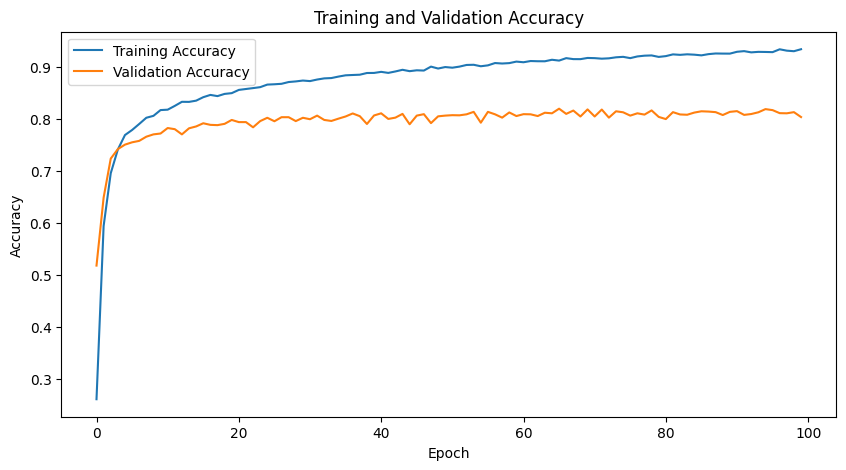

In [184]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# NN Experiment 6: （Different Architecture 5-layer with BatchNormalization)
## Hyperparameters (from the winner of the basci 5-layer architecture): 
- **input_size**: Dimensionality of the input features in the training data. (106)
- **model**: Instance of the `AirbnbPricePredictor` model with input size `input_size`.
- **criterion**: Loss function used for optimization, specifically L1 Loss (Mean Absolute Error) with reduction method set to mean.
- **optimizer**: Adam optimizer used for model parameter optimization with a learning rate of 0.0002.
- **scheduler**: Learning rate scheduler using StepLR method, with a step size of 50 epochs and a gamma value of 0.1.
- **epochs**: Total number of training epochs set to 200.
- **threshold**: Convergence threshold set to 0.1, indicating a 10% change in loss between epochs for early stopping or other convergence criteria.

### Results: 

- **Hit 82% val acc around epoch 50, where train acc hits 91% around epoch 54** （without Dropout)
- **Hit 82% val acc around epoch 60, where train acc hits 91% around epoch 95**  (Currently with BatchNormalization)
### We can see a slightly worse val and train acc with Batch Normalization. 



In [185]:
input_size = X_train_tensor.shape[1]
print(input_size)
model = AirbnbPricePredictorBN(input_size)
criterion = nn.L1Loss(reduction='mean')  # Using L1Loss for Mean Absolute Error
optimizer = optim.Adam(model.parameters(), lr=0.0002)
scheduler = StepLR(optimizer, step_size=50, gamma=0.1)

epochs = 200
threshold = 0.1  # 10% threshold

106


In [186]:
# Initialize lists to collect metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    train_correct_predictions = 0  # Separate variables for training accuracy calculation
    train_total_predictions = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # Check for NaN values in inputs
        if np.isnan(inputs).any():
            print("NaN values detected in inputs!")
            # Handle NaN values appropriately
            
        # Check for NaN values in labels
        if np.isnan(labels).any():
            print("NaN values detected in labels!")
            # Handle NaN values appropriately
            
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        
        # Calculate absolute percentage error for accuracy-like metric
        abs_percentage_error = torch.abs(outputs - labels) / labels
        
        # Count correct predictions within the threshold
        train_correct_predictions += torch.sum(abs_percentage_error <= threshold)
        train_total_predictions += len(labels)
        
    epoch_loss = running_loss / len(train_loader.dataset)
    training_accuracy = train_correct_predictions / train_total_predictions  # Using separate variables
    
    # Append training loss and accuracy to lists
    train_losses.append(epoch_loss)
    train_accuracies.append(training_accuracy)
    
    model.eval()
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            
            # Calculate absolute percentage error for accuracy-like metric
            abs_percentage_error = torch.abs(outputs - labels) / labels
            
            # Count correct predictions within the threshold
            correct_predictions += torch.sum(abs_percentage_error <= threshold)
            total_predictions += len(labels)
    
    epoch_val_loss = val_loss / len(val_loader.dataset)
    validation_accuracy = correct_predictions / total_predictions
    
    # Append validation loss and accuracy to lists
    val_losses.append(epoch_val_loss)
    val_accuracies.append(validation_accuracy)
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Training Accuracy: {training_accuracy:.2%}, Validation Accuracy: {validation_accuracy:.2%}')


Epoch 1/100, Loss: 3.7271, Val Loss: 1.4826, Training Accuracy: 1.59%, Validation Accuracy: 11.61%
Epoch 2/100, Loss: 0.5910, Val Loss: 0.3776, Training Accuracy: 54.82%, Validation Accuracy: 73.01%
Epoch 3/100, Loss: 0.3935, Val Loss: 0.3506, Training Accuracy: 69.93%, Validation Accuracy: 76.20%
Epoch 4/100, Loss: 0.3563, Val Loss: 0.3441, Training Accuracy: 74.31%, Validation Accuracy: 76.17%
Epoch 5/100, Loss: 0.3416, Val Loss: 0.3257, Training Accuracy: 76.14%, Validation Accuracy: 79.05%
Epoch 6/100, Loss: 0.3336, Val Loss: 0.3309, Training Accuracy: 77.23%, Validation Accuracy: 78.17%
Epoch 7/100, Loss: 0.3270, Val Loss: 0.3249, Training Accuracy: 77.58%, Validation Accuracy: 78.89%
Epoch 8/100, Loss: 0.3160, Val Loss: 0.3287, Training Accuracy: 79.83%, Validation Accuracy: 79.11%
Epoch 9/100, Loss: 0.3133, Val Loss: 0.3147, Training Accuracy: 79.80%, Validation Accuracy: 79.25%
Epoch 10/100, Loss: 0.3091, Val Loss: 0.3203, Training Accuracy: 80.04%, Validation Accuracy: 79.19%


Epoch 83/100, Loss: 0.2205, Val Loss: 0.2868, Training Accuracy: 90.87%, Validation Accuracy: 82.77%
Epoch 84/100, Loss: 0.2192, Val Loss: 0.2921, Training Accuracy: 90.57%, Validation Accuracy: 82.32%
Epoch 85/100, Loss: 0.2189, Val Loss: 0.2906, Training Accuracy: 90.60%, Validation Accuracy: 82.43%
Epoch 86/100, Loss: 0.2188, Val Loss: 0.2896, Training Accuracy: 90.46%, Validation Accuracy: 82.63%
Epoch 87/100, Loss: 0.2199, Val Loss: 0.2886, Training Accuracy: 90.62%, Validation Accuracy: 82.46%
Epoch 88/100, Loss: 0.2190, Val Loss: 0.2884, Training Accuracy: 90.73%, Validation Accuracy: 82.32%
Epoch 89/100, Loss: 0.2182, Val Loss: 0.2862, Training Accuracy: 90.58%, Validation Accuracy: 82.60%
Epoch 90/100, Loss: 0.2173, Val Loss: 0.2901, Training Accuracy: 90.77%, Validation Accuracy: 82.38%
Epoch 91/100, Loss: 0.2157, Val Loss: 0.2903, Training Accuracy: 91.24%, Validation Accuracy: 82.21%
Epoch 92/100, Loss: 0.2157, Val Loss: 0.2885, Training Accuracy: 90.92%, Validation Accurac

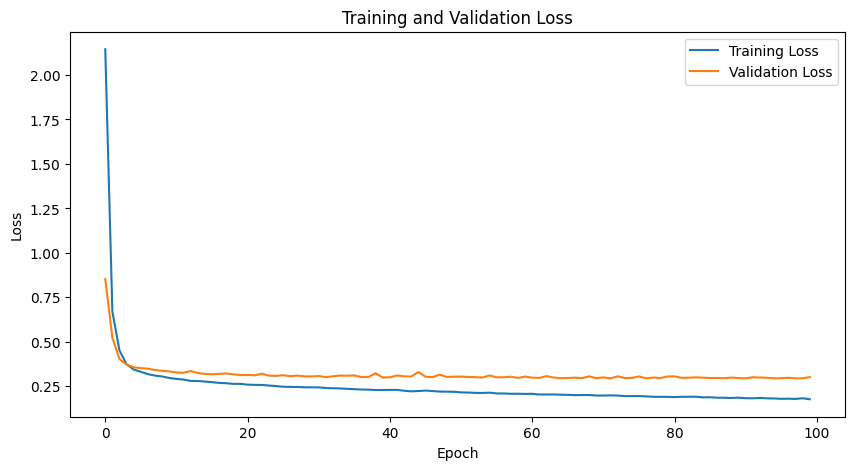

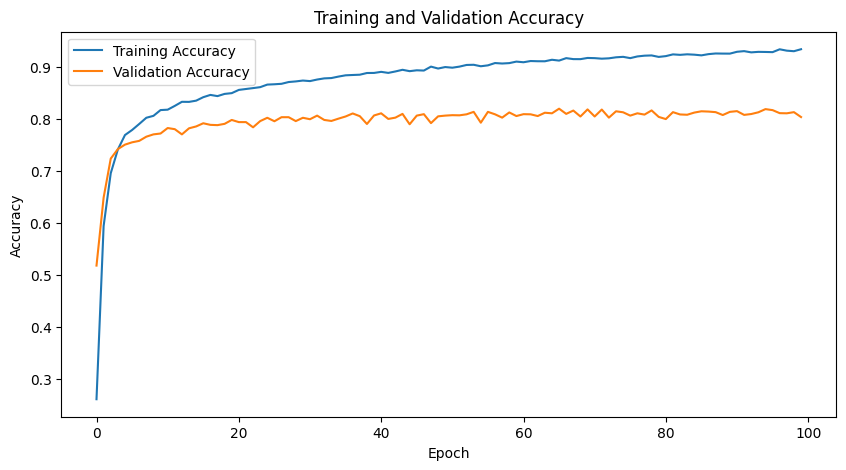

In [184]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# NN Experiment 7: （Different Architecture 9-layer)
## Hyperparameters (from the winner of the basci 5-layer architecture): 
- **input_size**: Dimensionality of the input features in the training data. (106)
- **model**: Instance of the `AirbnbPricePredictor` model with input size `input_size`.
- **criterion**: Loss function used for optimization, specifically L1 Loss (Mean Absolute Error) with reduction method set to mean.
- **optimizer**: Adam optimizer used for model parameter optimization with a learning rate of 0.0002.
- **scheduler**: Learning rate scheduler using StepLR method, with a step size of 50 epochs and a gamma value of 0.1.
- **epochs**: Total number of training epochs set to 200.
- **threshold**: Convergence threshold set to 0.1, indicating a 10% change in loss between epochs for early stopping or other convergence criteria.

### Results: 

- **Hit 82% val acc around epoch 50, where train acc hits 91% around epoch 54** （without Dropout)
- **Hit almost 82% val acc around epoch 98, where train acc hits alsmot 98% around epoch 100**  (Currently with 9 layers)
### Although with more layers, we can see a much better train accuracy, but we do not see a better val accuracy. This may indicate that overfitting has occurred with this more complex architecture. We also see some unusual val acc fluctuations around epoch 16. 


In [192]:
input_size = X_train_tensor.shape[1]
print(input_size)
model = AirbnbPricePredictor9Layer(input_size)
criterion = nn.L1Loss(reduction='mean')  # Using L1Loss for Mean Absolute Error
optimizer = optim.Adam(model.parameters(), lr=0.0002)
scheduler = StepLR(optimizer, step_size=50, gamma=0.1)

epochs = 200
threshold = 0.1  # 10% threshold

106


In [193]:
# Initialize lists to collect metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    train_correct_predictions = 0  # Separate variables for training accuracy calculation
    train_total_predictions = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # Check for NaN values in inputs
        if np.isnan(inputs).any():
            print("NaN values detected in inputs!")
            # Handle NaN values appropriately
            
        # Check for NaN values in labels
        if np.isnan(labels).any():
            print("NaN values detected in labels!")
            # Handle NaN values appropriately
            
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        
        # Calculate absolute percentage error for accuracy-like metric
        abs_percentage_error = torch.abs(outputs - labels) / labels
        
        # Count correct predictions within the threshold
        train_correct_predictions += torch.sum(abs_percentage_error <= threshold)
        train_total_predictions += len(labels)
        
    epoch_loss = running_loss / len(train_loader.dataset)
    training_accuracy = train_correct_predictions / train_total_predictions  # Using separate variables
    
    # Append training loss and accuracy to lists
    train_losses.append(epoch_loss)
    train_accuracies.append(training_accuracy)
    
    model.eval()
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            
            # Calculate absolute percentage error for accuracy-like metric
            abs_percentage_error = torch.abs(outputs - labels) / labels
            
            # Count correct predictions within the threshold
            correct_predictions += torch.sum(abs_percentage_error <= threshold)
            total_predictions += len(labels)
    
    epoch_val_loss = val_loss / len(val_loader.dataset)
    validation_accuracy = correct_predictions / total_predictions
    
    # Append validation loss and accuracy to lists
    val_losses.append(epoch_val_loss)
    val_accuracies.append(validation_accuracy)
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Training Accuracy: {training_accuracy:.2%}, Validation Accuracy: {validation_accuracy:.2%}')


Epoch 1/100, Loss: 1.4369, Val Loss: 0.5438, Training Accuracy: 39.15%, Validation Accuracy: 60.52%
Epoch 2/100, Loss: 0.4428, Val Loss: 0.3831, Training Accuracy: 67.87%, Validation Accuracy: 73.95%
Epoch 3/100, Loss: 0.3632, Val Loss: 0.3599, Training Accuracy: 74.54%, Validation Accuracy: 74.59%
Epoch 4/100, Loss: 0.3470, Val Loss: 0.3766, Training Accuracy: 75.81%, Validation Accuracy: 73.87%
Epoch 5/100, Loss: 0.3252, Val Loss: 0.3382, Training Accuracy: 78.27%, Validation Accuracy: 77.83%
Epoch 6/100, Loss: 0.3203, Val Loss: 0.3287, Training Accuracy: 78.95%, Validation Accuracy: 78.44%
Epoch 7/100, Loss: 0.3060, Val Loss: 0.3399, Training Accuracy: 80.90%, Validation Accuracy: 76.53%
Epoch 8/100, Loss: 0.3011, Val Loss: 0.3291, Training Accuracy: 81.22%, Validation Accuracy: 77.94%
Epoch 9/100, Loss: 0.2947, Val Loss: 0.3239, Training Accuracy: 81.79%, Validation Accuracy: 78.91%
Epoch 10/100, Loss: 0.2885, Val Loss: 0.3233, Training Accuracy: 82.69%, Validation Accuracy: 78.83%

Epoch 83/100, Loss: 0.1511, Val Loss: 0.2917, Training Accuracy: 96.00%, Validation Accuracy: 81.85%
Epoch 84/100, Loss: 0.1510, Val Loss: 0.2930, Training Accuracy: 96.00%, Validation Accuracy: 81.35%
Epoch 85/100, Loss: 0.1505, Val Loss: 0.2901, Training Accuracy: 96.11%, Validation Accuracy: 81.49%
Epoch 86/100, Loss: 0.1501, Val Loss: 0.2950, Training Accuracy: 96.20%, Validation Accuracy: 81.52%
Epoch 87/100, Loss: 0.1514, Val Loss: 0.2958, Training Accuracy: 96.15%, Validation Accuracy: 81.05%
Epoch 88/100, Loss: 0.1475, Val Loss: 0.2945, Training Accuracy: 96.24%, Validation Accuracy: 81.32%
Epoch 89/100, Loss: 0.1460, Val Loss: 0.2941, Training Accuracy: 96.39%, Validation Accuracy: 81.55%
Epoch 90/100, Loss: 0.1448, Val Loss: 0.2910, Training Accuracy: 96.45%, Validation Accuracy: 81.57%
Epoch 91/100, Loss: 0.1466, Val Loss: 0.3079, Training Accuracy: 96.20%, Validation Accuracy: 79.77%
Epoch 92/100, Loss: 0.1445, Val Loss: 0.2906, Training Accuracy: 96.46%, Validation Accurac

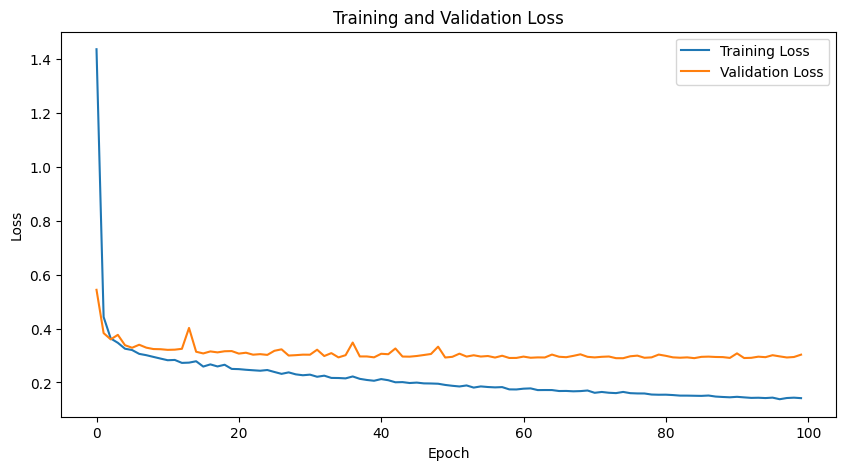

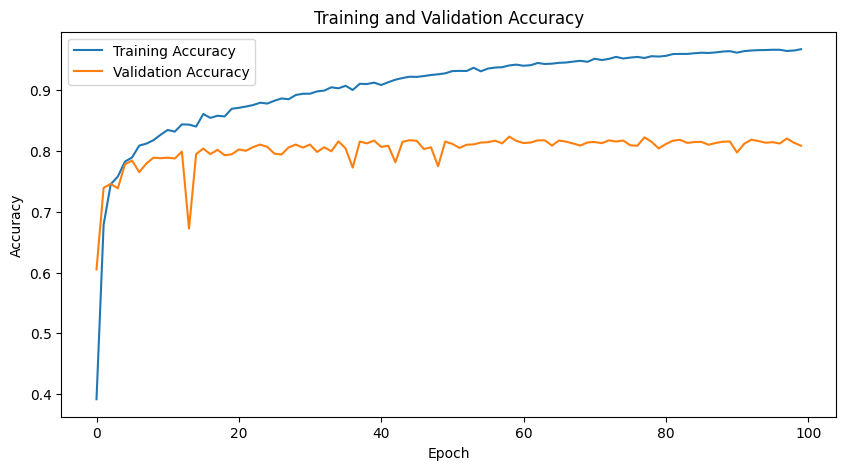

In [194]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
